# **Telco Customer Churn**

**Created by: Rizqi Rahmadani Zuhri Saputri**

**Table of content :**

1. Business Problem Understanding
2. Data Understanding
3. Exploratory Data Analysis
4. Data Preparation
5. Modeling Experiment
6. Model Intrepetation
7. Prediction Unseen Data
8. Conclusion and Reccomendation

****

## **1. Business Problem Understanding**

### **Context:**
A subscription business model is a recurring revenue model in which customers pay a weekly, monthly, or yearly fee in exchange for products or services. Customers can renew their subscription after a certain period of time. This business model really depend on recurring revenue, monthly recurring revenue (MRR) is the lifeblood of the subscription business. Without predictable sources of revenue, it’s impossible to sustain business over the long-term. On the flip side, it’s critical to track churned MRR to assess how customer attrition affects the revenue. If business losing customers too quickly, it can seriously hurt business ability to grow.


### **Problem Statement:**
Customer churn (or customer attrition) refers to the loss of customers or subscribers for any reason at all, businesses measure and track churn as a percentage of lost customers compared to total number of customers over a given time period. Based on the historical data, Telco has a relatively high rate of customer churn, almost 30%. If this continues, the company will keep losing recurring revenue and it will also affect the company's ability to grow. Additionally, the company will spend more funds to acquire new customers, because according to Harvard Business Review, converting a first-time customer is 5 to 25 times more expensive than keeping an existing one. A significant reduction in churn rate makes your business more profitable because you’re able to keep most subscribers within your customer base.

Problem: There haven't been any effective preventive strategies taken yet to prevent customers from leaving the company.

**Stakeholders** : Marketing Manager

### **Goals**
As data scientist we try to help the company in identifying warning signs of customer churn in order to `reduce the risk of losing recurring revenue by 80%`. With answering some questions:
   
    - What are the characteristics of customers who left the service?
    - How can the company predict the chances of customers churning?
    - What factors influence the chances of customers leaving the company?

This enables company to proactively implement targeted retention strategies, significantly lowering the chances of customers leaving and thus, effectively reducing future churn rates.



### **Analytical Approach:**

Here are the steps of analysis we will undertake:

* __Step-1:__ Perform Exploratory Data Analysis (EDA) to discover the behavior of customers who leave the company.
* __Step-2:__ Build a classification model based on behavioral analysis to predict the chances of customers leaving the company.
* __Step-3:__ Identify the factors that contribute to customers' chances of leaving the company.
* __Step-4:__ Develop a scheme/strategy simulated to reduce the chances of customers leaving the company (churn rate). 

The analysis results will be accessible to stakeholders through a dedicated platform (Web/Mobile) whenever targeted retention strategies are to be implemented. The workflow is as follows:

1. Stakeholders input customer data.
2. The system provides a list of customers with high potential to leave the company.
3. Stakeholders use the analysis results to implement targeted retention strategies.


### **Metric Evaluation:**

This analysis will focus on customers who have left the company. The targets are defined as follows:

- **0:** Indicates customers who did not leave the company.
- **1:** Indicates customers who left the company.

Ensuring the accuracy of the model is crucial to avoid the financial impact of classification errors (false positives or false negatives).

| **Error Type**     |**Explanation** | **Consequences** | 
|-----------------|------------|----------------|
| **False Positive / Type 1 Error**  | The model incorrectly predicts that the customer will leave the company, when in fact they will not | The company will incur unnecessary marketing expenses by targeting loyal customers |
| **False Negative / Type 2 Error**  | This happens when the model incorrectly predicts that the customer will not leave the company when, in fact, they will | The company will lose recurring revenue and spends more funds to acquire new customers| 

We will conduct simulations to get an overview of the consequences of each type of error using the following facts:
- Median of monthly charges (recuring revenue) around $70,35 per customer
- Median of tenure (customer lifespan) for all customers around 29 month and for the churned is 9 month
- Average customer acquisition cost (CAC) for telecomunication industry is $694 per-customer [source](https://userpilot.com/blog/average-customer-acquisition-cost/)
- Retention cost for SaaS company 4-5 times smaller than CAC [source](https://www.forbes.com/sites/forbesbusinesscouncil/2022/12/12/customer-retention-versus-customer-acquisition/?sh=2c41201c1c7d)

**Type 1 Error Simulation**

Retention Cost= ($694/4)= $173,5 per Customer

**Type 2 Error Simulation**

Losing Customer Lifetime Value = Recurring Revenue x Diff Customer Lifespan = $70,35x(29-9)= $1407

Losing Customer Lifetime Value + Customer Acquisition Cost= $1407 + $694= $2101 per Customer

Note: This costs are an estimated result based on the average of the same industry, this value can be smaller or larger depending on other factors that influenced each company.


## **2. Data Understanding**

### **About the Dataset**
The dataset represents customer profiles who have left the telco company. A churn in telco and other subscription-based services means a situation when the customer leaves the service provider.

### **Data Attribute: Target & Features**

The main goal of this machine learning development is to classify customers who will leave the company or not.

| Target | Data Type | Description |
| --- | --- | --- |
| Churn | String | Whether the customer churns or not |

In machine learning, a feature refers to an individual measurable property or characteristic of a phenomenon being observed. Features are essentially variables or attributes that are used as inputs to a machine learning model to make predictions or decisions.

| Feature | Data Type | Description |
| --- | --- | --- |
| Dependents| String | Whether the customer has dependents or not |
| Tenure | Integer | How long customer using the services (customer lifetime) |
| OnlineSecurity | String | Whether the customer has online security or not |
| OnlineBackup | String | Whether the customer has online backup or not |
| InternetService | String | Whether the client is subscribed to Internet service |
| DeviceProtection | String | Whether the client has device protection or not |
| TechSupport | String | Whether the client has tech support or not |
| Contract | String | Type of contract according to duration |
| PaperlessBilling | String | Bills issued in paperless form |
| MonthlyCharges| Float | How much customer pay for services each month|



In [2]:
import pandas as pd
import numpy as np
import altair as alt
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import shapiro
import phik
from phik import resources, report
import warnings
warnings.filterwarnings('ignore',category=UserWarning)


alt.data_transformers.disable_max_rows()

DataTransformerRegistry.enable('default')

In [3]:
df= pd.read_csv('../data/data_telco_customer_churn.csv')

display(df.describe(), df.describe(include=['object']))

,tenure,MonthlyCharges
count,4930.000000,4930.000000
mean,32.401217,64.883032
std,24.501193,29.923960
min,0.000000,18.800000
25%,9.000000,37.050000
50%,29.000000,70.350000
75%,55.000000,89.850000
max,72.000000,118.650000


,Dependents,OnlineSecurity,OnlineBackup,InternetService,DeviceProtection,TechSupport,Contract,PaperlessBilling,Churn
count,4930,4930,4930,4930,4930,4930,4930,4930,4930
unique,2,3,3,3,3,3,3,2,2
top,No,No,No,Fiber optic,No,No,Month-to-month,Yes,No
freq,3446,2445,2172,2172,2186,2467,2721,2957,3614


Total customers of Telco is 4930:

- Dependents: 70% customers didn't have dependents
- Online Security: 50% customers didn't have online security
- Online Backup: 44% customers did't have online backup
- Internet Service: 44% customers have fiber optic as internet service
- Device Protection: 44% customers didn't have device protection
- Tech Support: 50% customers did't have tech support
- Contract: 55% customers choose Month-to-month as contract type
- Billing: 60% customers choose paperless form for billing
- Tenure: The median time of customers using the services is 29 Months
- Monthly Charges: The median value of monthly charges is $70
- Churn: 27% of customers churns

In [4]:
df1= df[df['Churn']=='Yes']
df1.describe()

,tenure,MonthlyCharges
count,1316.000000,1316.000000
mean,17.674772,74.457637
std,19.279312,24.416526
min,1.000000,18.850000
25%,2.000000,56.437500
50%,9.000000,79.700000
75%,28.000000,94.200000
max,72.000000,118.350000


### **Data Condition: Quality and Representativeness**

Data quality and representativeness are critical aspects in machine learning because they directly impact the performance and reliability of the models trained on the data

In [5]:
#Dataset Information
print(f'Sum of row and columns: {df.shape}')

pd.DataFrame({
    'Name': df.columns.values,
    'Type': df.dtypes.values,
    'N/A (%)': df.isna().mean().values * 100,
    'Unique': df.nunique().values,
    'Sample': [df[col].unique() for col in df.columns]
})

Sum of row and columns: (4930, 11)


,Name,Type,N/A (%),Unique,Sample
0,Dependents,object,0.0,2,"[Yes, No]"
1,tenure,int64,0.0,73,"[9, 14, 64, 72, 3, 40, 17, 11, 8, 47, 18, 5, 1..."
2,OnlineSecurity,object,0.0,3,"[No, Yes, No internet service]"
3,OnlineBackup,object,0.0,3,"[No, Yes, No internet service]"
4,InternetService,object,0.0,3,"[DSL, Fiber optic, No]"
5,DeviceProtection,object,0.0,3,"[Yes, No internet service, No]"
6,TechSupport,object,0.0,3,"[Yes, No, No internet service]"
7,Contract,object,0.0,3,"[Month-to-month, Two year, One year]"
8,PaperlessBilling,object,0.0,2,"[Yes, No]"
9,MonthlyCharges,float64,0.0,1422,"[72.9, 82.65, 47.85, 69.65, 23.6, 74.55, 19.7,..."


**From this table we know that**
- All data are present and available, no null value found.
- The uniformity and coherence of data is good, consistent typography.
- Features online security, online backup, device protection, and tech support need internet service to be available

## **3. Exploratory Data Analysis**


##### **Normality Assesment**
- From graphical method using histogram and frequentist test using Saphiro the distribution data of Tenure and Monthly Charges are not normal.

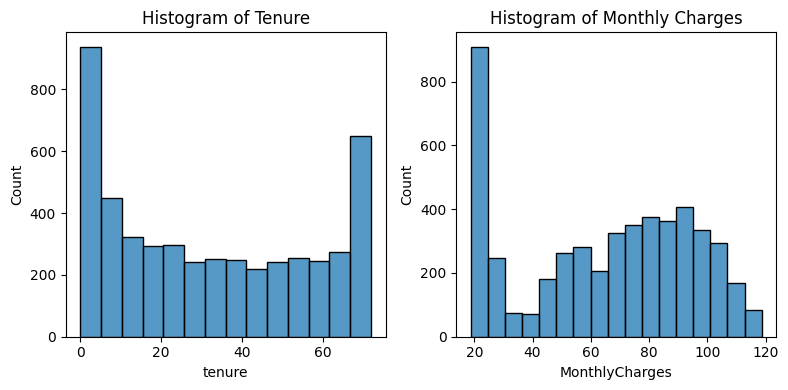

In [6]:
# Set up the figure and axes
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(8, 4))

# Create boxplot for 'tenure'
sns.histplot(x=df['tenure'], ax=axes[0])
axes[0].set_title('Histogram of Tenure')

# Create boxplot for 'MonthlyCharges'
sns.histplot(x=df['MonthlyCharges'], ax=axes[1])
axes[1].set_title('Histogram of Monthly Charges')

plt.tight_layout()
plt.show()


In [7]:
df_num= df.select_dtypes(include='number')

def test_normality(df, alpha=0.05):
    # Create an empty DataFrame to hold the results
    result_df = pd.DataFrame(index=df.columns, columns=["Normality Test Result"])
    
    # Perform Shapiro-Wilk test for each column
    for column in df.columns:
        data = df[column]
        stat, p = shapiro(data)
        if p > alpha:
            result = "Normal"
        else:
            result = "Not Normal"
        result_df.loc[column, "Normality Test Result"] = result
    
    return result_df

# Example usage:
# Assuming 'my_dataframe' is your DataFrame containing your data
result_df = test_normality(df_num).reset_index()
result_df

,index,Normality Test Result
0,tenure,Not Normal
1,MonthlyCharges,Not Normal


##### **Correlation Assesment**
- Numerical features have low correlation with each other
- The correlation among categorical features appears to be very high in features like online security, online backup, internet service, device protection, and tech support this can lead into multicolinearity that can affect model performance. These features also have medium correlation with the contract type, whereas the correlation with dependents and paperless billing is very low.
- The correlation between features and the target mostly has low magnitude, with only one feature can be considered as medium magnitude, which is tenure with a negative correlation direction.

In [8]:
from sklearn.preprocessing import LabelEncoder
df_corr= df.copy()
df_corr['churn_encoded']= LabelEncoder().fit_transform(df['Churn'])

In [9]:
df_corr.select_dtypes(include='number').corr('spearman').style.background_gradient(cmap='YlOrRd')

,tenure,MonthlyCharges,churn_encoded
tenure,1.000000,0.265964,-0.377811
MonthlyCharges,0.265964,1.000000,0.184612
churn_encoded,-0.377811,0.184612,1.000000


In [10]:
df_corr.select_dtypes(include='object').phik_matrix().style.background_gradient(cmap='YlOrRd')

,Dependents,OnlineSecurity,OnlineBackup,InternetService,DeviceProtection,TechSupport,Contract,PaperlessBilling,Churn
Dependents,1.000000,0.111586,0.086239,0.107844,0.083325,0.102492,0.147841,0.168718,0.263869
OnlineSecurity,0.111586,1.000000,0.947036,0.949761,0.946561,0.952145,0.630316,0.209820,0.209128
OnlineBackup,0.086239,0.947036,1.000000,0.942894,0.948154,0.947837,0.576490,0.194131,0.182379
InternetService,0.107844,0.949761,0.942894,1.000000,0.942801,0.949225,0.507184,0.230172,0.196474
DeviceProtection,0.083325,0.946561,0.948154,0.942801,1.000000,0.950512,0.627447,0.194845,0.166714
TechSupport,0.102492,0.952145,0.947837,0.949225,0.950512,1.000000,0.665337,0.200426,0.204940
Contract,0.147841,0.630316,0.576490,0.507184,0.627447,0.665337,1.000000,0.105672,0.257979
PaperlessBilling,0.168718,0.209820,0.194131,0.230172,0.194845,0.200426,0.105672,1.000000,0.290668
Churn,0.263869,0.209128,0.182379,0.196474,0.166714,0.204940,0.257979,0.290668,1.000000


- Dilhat dari grafik hubungan antara internet servis dengan fitur online security, online backup, device protection, tech support, korelasi yang tinggi dikarenakan customer yang tidak memiliki internet servis menyebabkan fitur lainnya memiliki label 'No Internet Service'. Sementara untuk jenis internet servis lainnya (DSL dan Fiber Optic) tidak membuat customer menggunakan atau tidak menggunakan fitur lainnya.

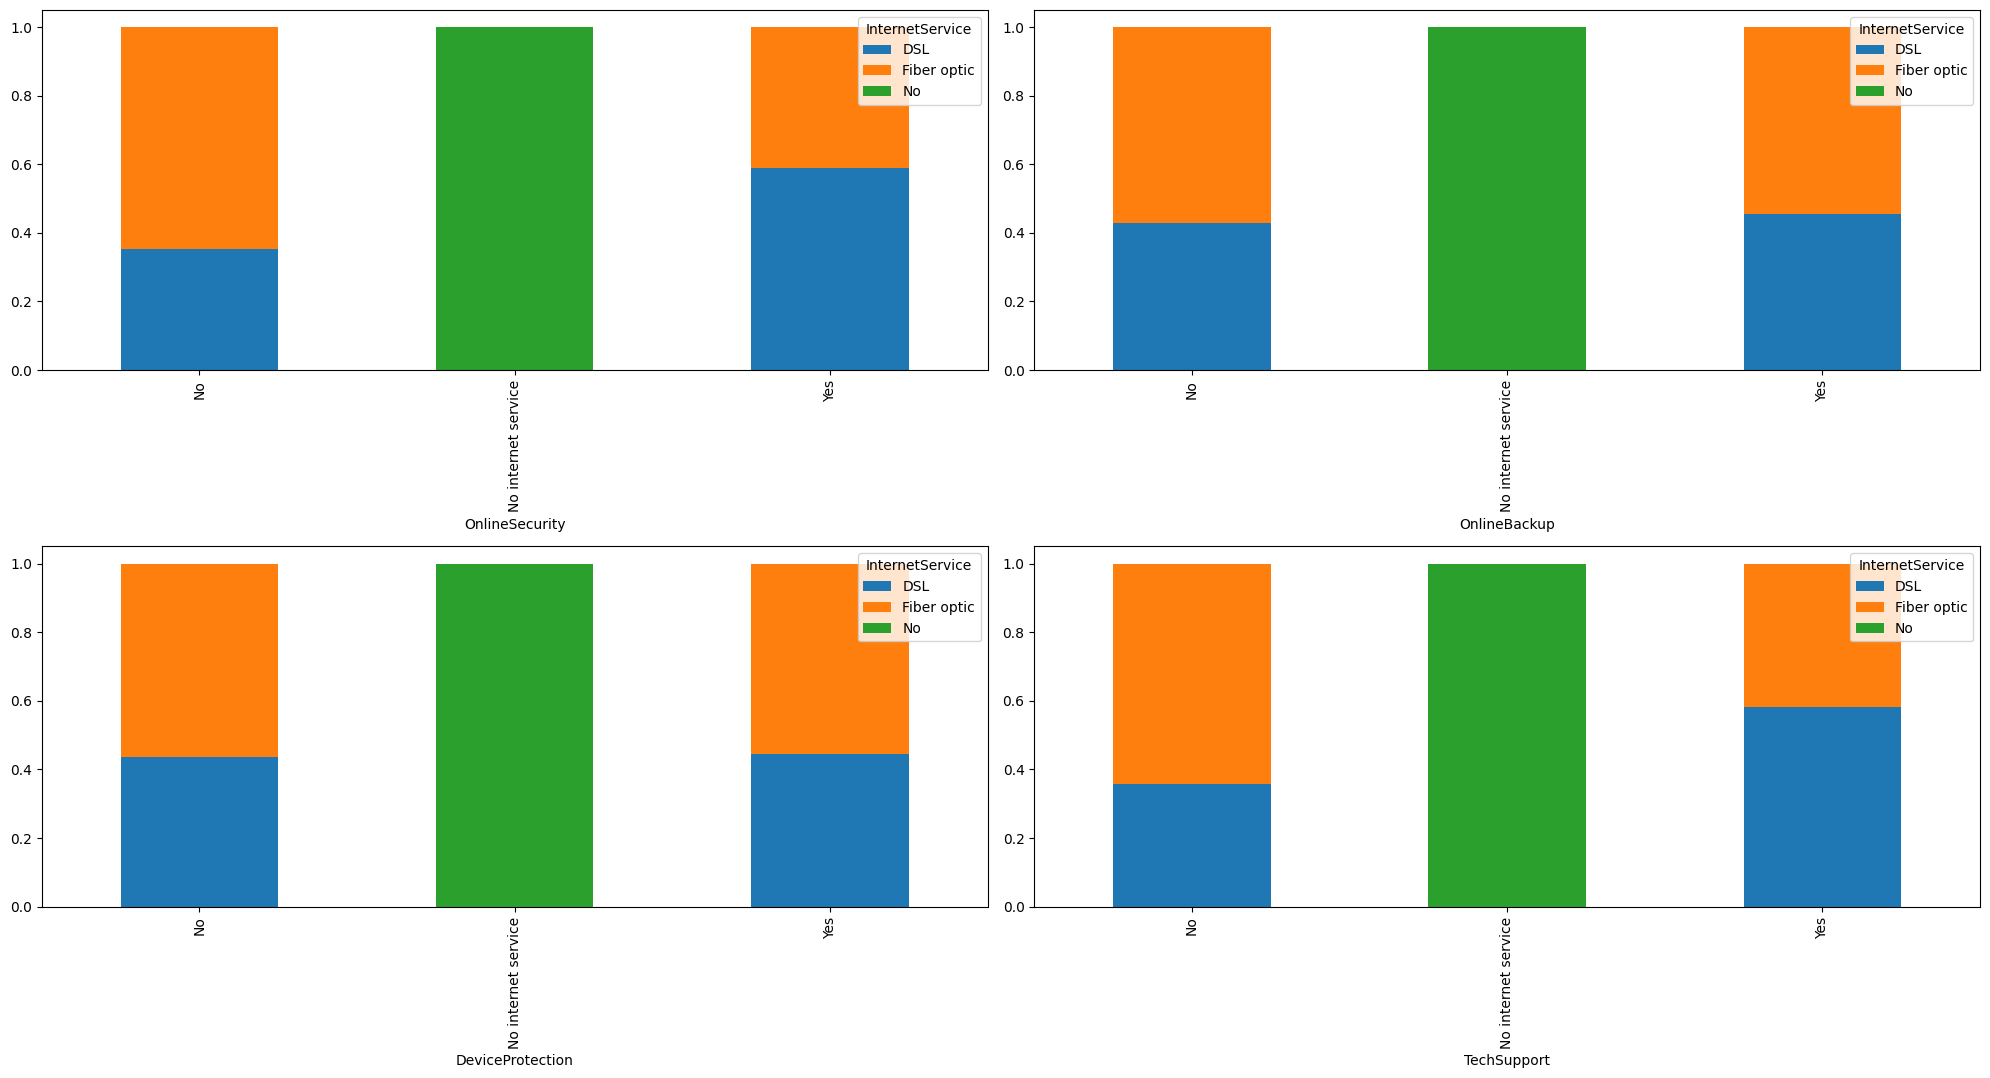

In [11]:
count = 0
fig = plt.figure(figsize=(20,20))

for i in df[["OnlineSecurity","OnlineBackup", "DeviceProtection", "TechSupport"]]:
    count +=1
    ax= plt.subplot(4,2,count)
    pd.crosstab(df[i],df["InternetService"],normalize=0).plot(kind='bar',stacked=True,ax=ax)
    fig.tight_layout()

plt.show()

- Dilhat dari grafik hubungan antara online security dengan fitur internet servis, online backup, device protection, tech support, juga terlihat korelasi yang tinggi disebabkan oleh label 'No Internet Service'. Namun untuk pelanggan yang memiliki online security tidak semua menggunakan fitur lainnya, dan juga sebaliknya.

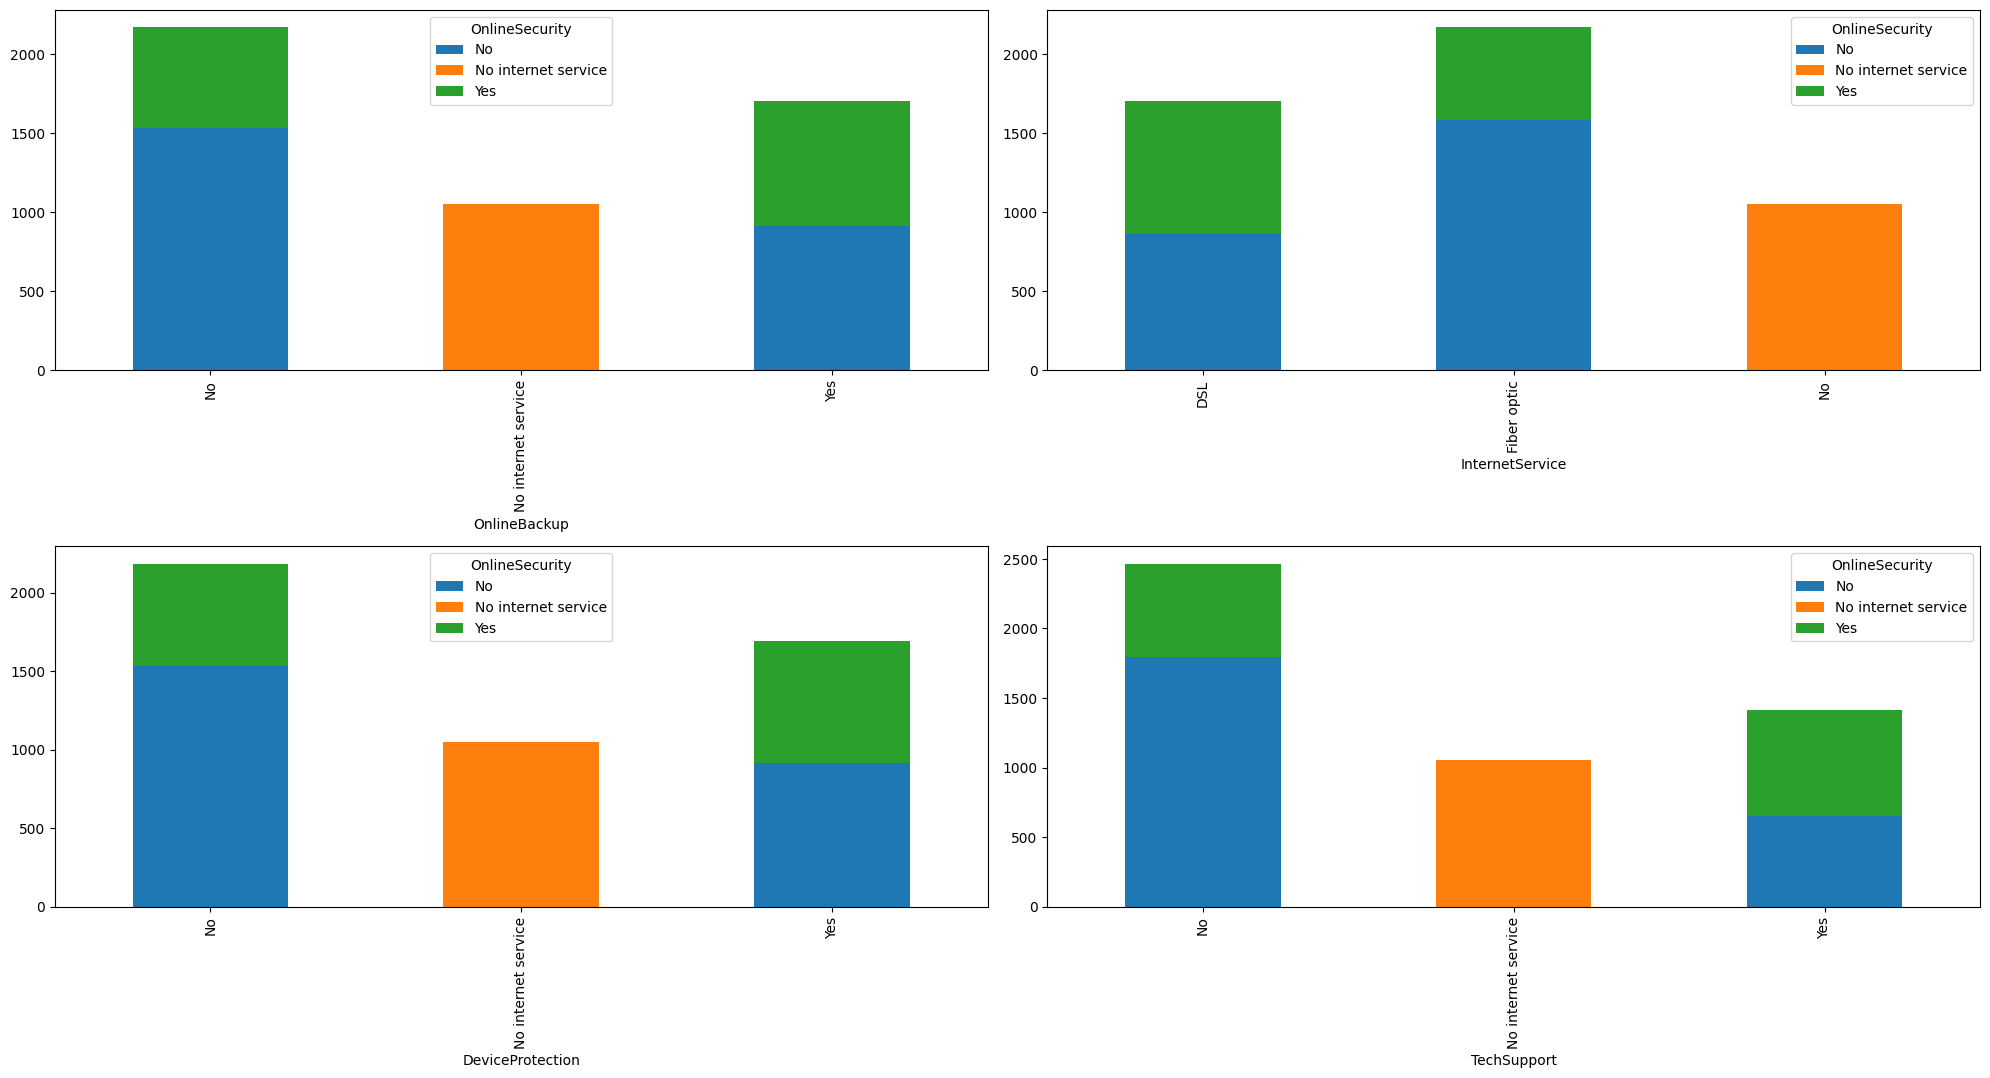

In [12]:
count = 0
fig = plt.figure(figsize=(20,20))

for i in df[["OnlineBackup", "InternetService", "DeviceProtection", "TechSupport"]]:
    count +=1
    ax= plt.subplot(4,2,count)
    pd.crosstab(df[i],df["OnlineSecurity"],normalize=False).plot(kind='bar',stacked=True,ax=ax)
    fig.tight_layout()

plt.show()

- Categorical dan Target

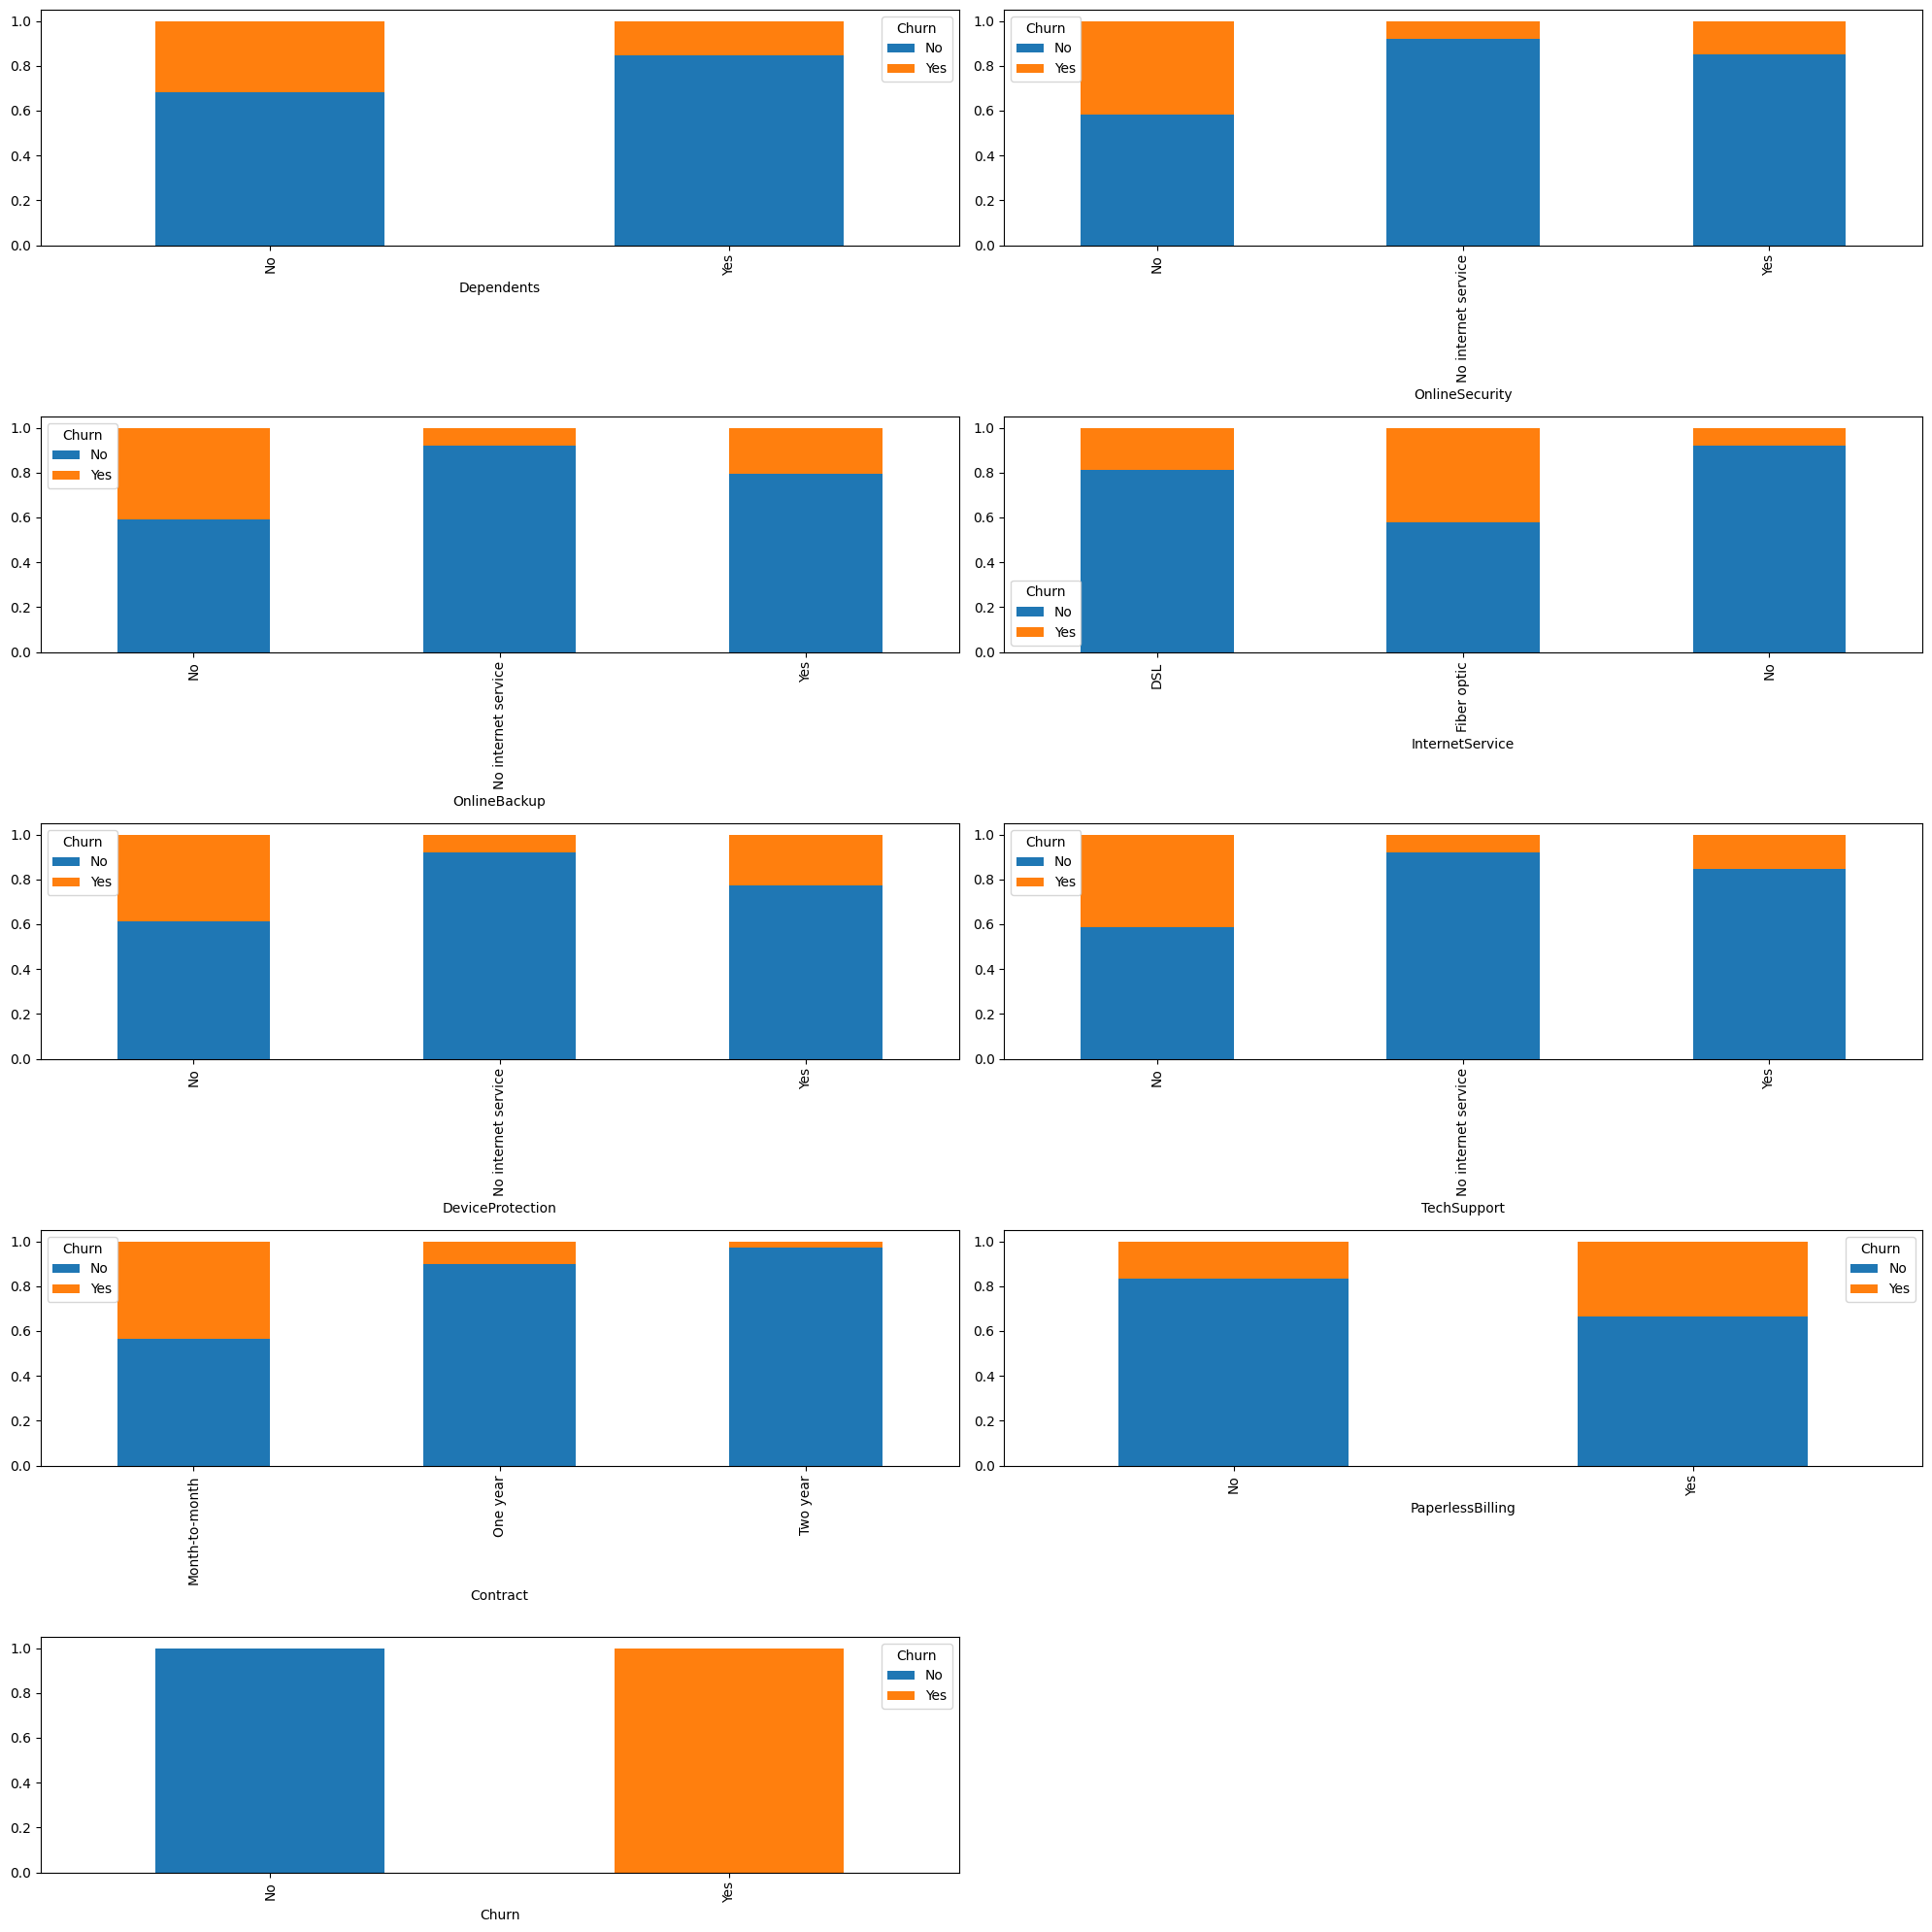

In [13]:
count = 0
fig = plt.figure(figsize=(20,20))

for i in df.select_dtypes(include='object').columns:
    count +=1
    ax= plt.subplot(5,2,count)
    pd.crosstab(df[i],df['Churn'],normalize=0).plot(kind='bar',stacked=True,ax=ax)
    fig.tight_layout()

plt.show()

- `Dependents`: Presentase customer churn lebih banyak pada customer yang tidak memiliki dependents
- `Online Security`: Presentase customer churn lebih banyak pada customer yang tidak memiliki online security
- `Online Backup`: Presentase customer churn lebih banyak pada customer yang tidak memiliki online backup
- `Internet Servis`: Presentase customer churn lebih banyak pada customer yang memakai fiber optic
- `Device Protection`: Presentase customer churn lebih banyak pada customer yang tidak memiliki device protection
- `Tech Support`: Presentase customer churn lebih banyak pada customer yang tidak memiliki tech support
- `Contract`: Presentase customer churn lebih banyak pada customer yang memilih Month-to-month sebgai type contractnya
- `Paperless Billing`: Presentase customer churn lebih banyak pada customer yang memilih paperless billing


## **4. Data Preparation**

#### **Duplicated Value**

In [14]:
# Check duplicated value
df.duplicated().mean()*100

1.561866125760649

In [15]:
# Drop duplicated
df.drop_duplicates(inplace= True)

#### **Outlier Data**

- The tenure and monthly charges features don't have outlier data

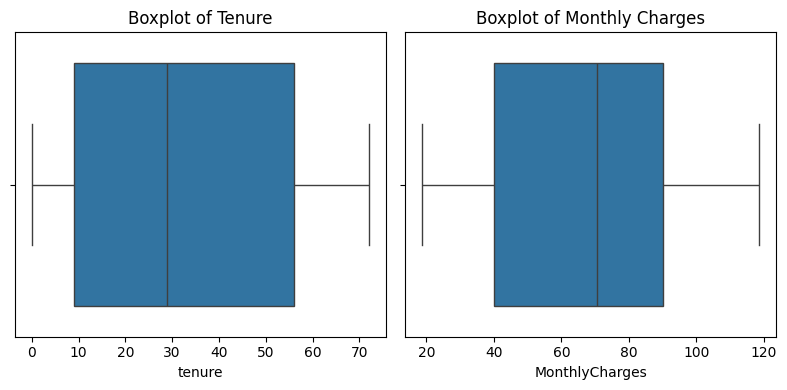

In [16]:
# Set up the figure and axes
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(8, 4))

# Create boxplot for 'tenure'
sns.boxplot(x=df['tenure'], ax=axes[0])
axes[0].set_title('Boxplot of Tenure')

# Create boxplot for 'MonthlyCharges'
sns.boxplot(x=df['MonthlyCharges'], ax=axes[1])
axes[1].set_title('Boxplot of Monthly Charges')

plt.tight_layout()
plt.show()


In [17]:
columns_of_interest = ['tenure', 'MonthlyCharges']
outlier_info = {}

for column in columns_of_interest:
    # Calculate the IQR
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    
    # Define lower and upper bounds for outliers
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    
    # Filter the DataFrame to extract outlier data
    outliers = df[(df[column] < lower_bound) | (df[column] > upper_bound)]
    
    # Summarize the outlier data
    outlier_sum = outliers[column].count()
    
    # Store the outlier sum in the dictionary
    outlier_info[column] = {'Lower Bound': lower_bound, 'Upper Bound': upper_bound, 'Total Outlier': outlier_sum}

# Step 4: Convert the dictionary to a DataFrame for table format
outlier_table = pd.DataFrame(outlier_info).transpose()

outlier_table['Percentage']= round(outlier_table['Total Outlier']/df['Dependents'].count()*100,2)
outlier_table

,Lower Bound,Upper Bound,Total Outlier,Percentage
tenure,-61.50,126.50,0.0,0.0
MonthlyCharges,-34.95,165.05,0.0,0.0


#### **Data Types and Cardinality**


- 8 out of 10 features are categorical data type, which must be encoded
- The categorical data types have only 2-3 unique labels which can be categorized as **low cardinality**

In [18]:
pd.DataFrame({
    'Name': df.columns.values,
    'Type': df.dtypes.values,
    'N/A (%)': df.isna().mean().values * 100,
    'Unique': df.nunique().values,
    'Sample': [df[col].unique() for col in df.columns]
})

,Name,Type,N/A (%),Unique,Sample
0,Dependents,object,0.0,2,"[Yes, No]"
1,tenure,int64,0.0,73,"[9, 14, 64, 72, 3, 40, 17, 11, 8, 47, 18, 5, 1..."
2,OnlineSecurity,object,0.0,3,"[No, Yes, No internet service]"
3,OnlineBackup,object,0.0,3,"[No, Yes, No internet service]"
4,InternetService,object,0.0,3,"[DSL, Fiber optic, No]"
5,DeviceProtection,object,0.0,3,"[Yes, No internet service, No]"
6,TechSupport,object,0.0,3,"[Yes, No, No internet service]"
7,Contract,object,0.0,3,"[Month-to-month, Two year, One year]"
8,PaperlessBilling,object,0.0,2,"[Yes, No]"
9,MonthlyCharges,float64,0.0,1422,"[72.9, 82.65, 47.85, 69.65, 23.6, 74.55, 19.7,..."


**Target**
| Target | Data Type | Handling |
| --- | --- | --- |
| Churn | Nominal | Encode |

**Numeric Feature**

| Feature | Data Type | Handling |
| --- | --- | --- |
| Tenure | Discrete | - |
| MonthlyCharges | Continues | -|

**Categorical Feature**

| Feature | Data Type | Handling |
| --- | --- | --- |
| Dependents| Nominal | One Hot Encoding |
| OnlineSecurity | Nominal | One Hot Encoding |
| OnlineBackup	| Nominal | One Hot Encoding |
| InternetService | Nominal | One Hot Encoding |
| DeviceProtection | Nominal | One Hot Encoding |
| TechSupport | Nominal | One Hot Encoding |
| Contract | Nominal | One Hot Encoding |
| PaperlessBilling | Nominal | One Hot Encoding|


#### **Rare Label and Imbalance Data**

- From all categorical features the frequency of occurrence for each label is quite common and does not tend towards rare labels.
- The ratio between 'No' and 'Yes' labels in the target is 7:3, so it can be said that the dataset has mild imbalance data, which can lead to biased models and reduced performance [source](https://developers.google.com/machine-learning/data-prep/construct/sampling-splitting/imbalanced-data)

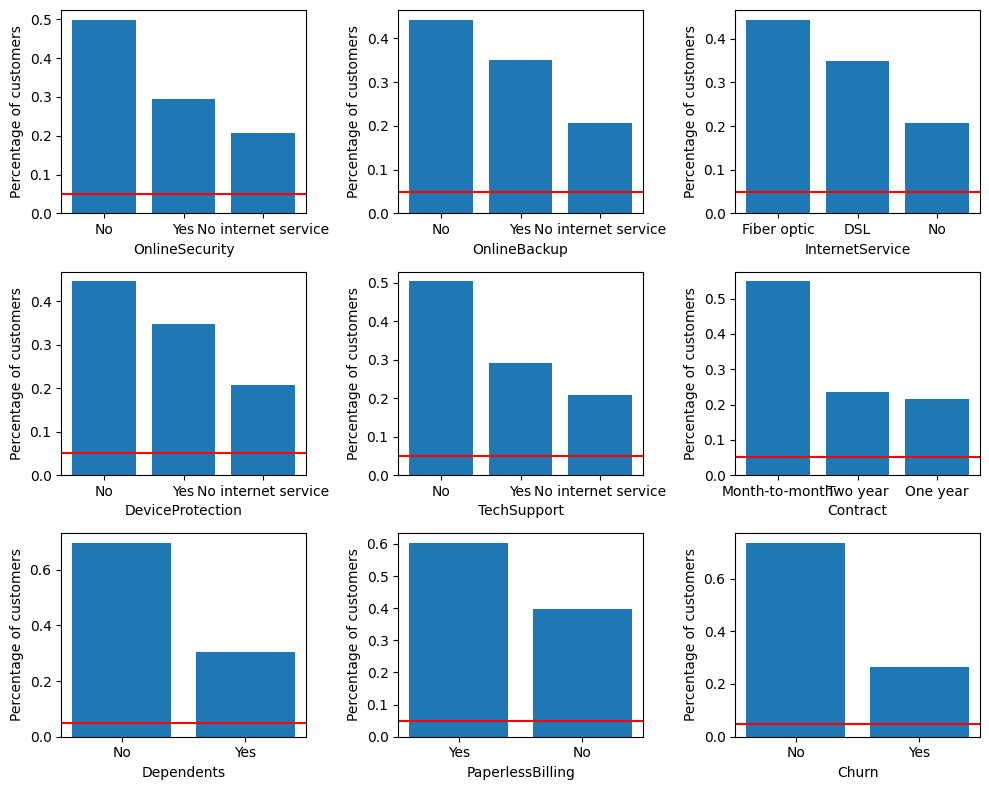

In [19]:
# Total customers
total_customers= len(df)
cat_cols = ["OnlineSecurity", "OnlineBackup", "InternetService", "DeviceProtection", "TechSupport", "Contract", "Dependents", "PaperlessBilling", "Churn"]

# Define the number of rows and columns for the subplot grid
num_rows = 3
num_cols = 3

# Calculate the total number of plots
total_plots = num_rows * num_cols

# Create a new figure
fig, axs = plt.subplots(num_rows, num_cols, figsize=(10, 8))

# Initialize a counter for the plots
plot_counter = 0

# Loop through each categorical variable
for col in cat_cols:
    # Calculate the percentage of houses per category
    temp_df = pd.Series(df[col].value_counts() / total_customers)

    # Sort the values in descending order
    temp_df = temp_df.sort_values(ascending=False)

    # Determine the position of the current plot in the subplot grid
    row_index = plot_counter // num_cols
    col_index = plot_counter % num_cols

    # Plot the data in the appropriate subplot
    axs[row_index, col_index].bar(temp_df.index, temp_df)
    axs[row_index, col_index].set_xlabel(col)
    axs[row_index, col_index].set_ylabel('Percentage of customers')

    # Add a red line at the threshold for rare categories (5%)
    axs[row_index, col_index].axhline(y=0.05, color='red')

    # Increment the plot counter
    plot_counter += 1

# Adjust layout to prevent overlapping of subplots
plt.tight_layout()

# Show the plots
plt.show()


,class,n_churned
0,No,3565
1,Yes,1288


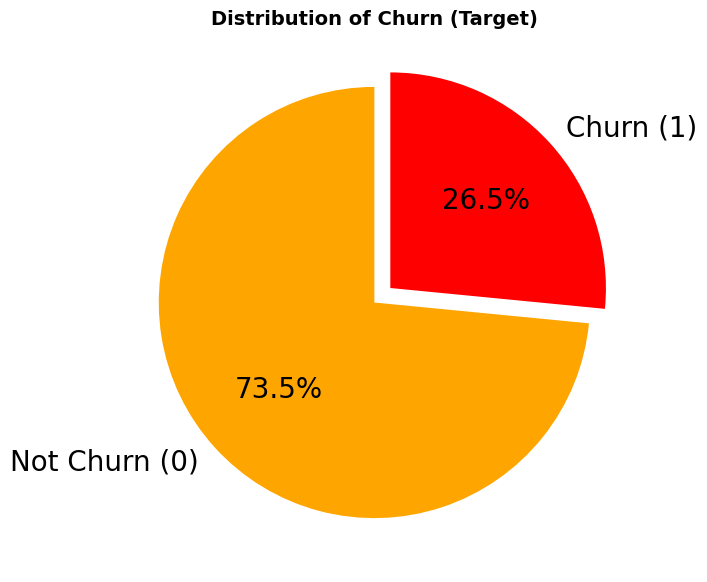

In [20]:
plt.figure(figsize=(7,7))
plt.title('Distribution of Churn (Target)', size=14, weight='bold')
plt.pie(df['Churn'].value_counts(), explode=(0,0.1), labels=['Not Churn (0)', 'Churn (1)'], colors=["orange","red"], autopct='%1.1f%%', 
        startangle=90, textprops={"fontsize":20})

n_churned = pd.DataFrame(df['Churn'].value_counts()).reset_index().rename(columns={'index':'class', 'Churn':'n_churned'})
n_churned

#### **Data Preprocessing**

In [21]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from category_encoders import BinaryEncoder
from sklearn.preprocessing import RobustScaler
from sklearn.preprocessing import PolynomialFeatures
from pycaret.internal.preprocess.transformers import TransformerWrapper
from sklearn.metrics import fbeta_score
from imblearn.over_sampling import SMOTE
from pycaret.internal.preprocess.transformers import FixImbalancer

In [22]:
RANDOM_STATE = 15

# Encode Target
df['Churn'] = np.where(df['Churn']=='Yes', 1, 0)

# Split dataset
df_seen, df_unseen = train_test_split(df, test_size=0.2, random_state=RANDOM_STATE, stratify=df['Churn'])

In [23]:
# Save Data
df_seen.to_csv("../data/df_seen.csv")
df_unseen.to_csv("../data/df_unseen.csv")

In [24]:
# Data prepocessor pipeline 1
pipeline_1= [
    ("onehot", TransformerWrapper(
        include=['Dependents', 'PaperlessBilling','OnlineSecurity', 'OnlineBackup','InternetService', 'DeviceProtection', 'TechSupport', 'Contract'], 
        transformer=OneHotEncoder(drop='first'))),
]

In [25]:
# Data prepocessor pipeline 2
pipeline_2= [
    ("onehot", TransformerWrapper(
        include=['Dependents', 'PaperlessBilling'], 
        transformer=OneHotEncoder(drop='first'))),
    ("binary", TransformerWrapper(
        include=['OnlineSecurity', 'OnlineBackup','InternetService', 'DeviceProtection', 'TechSupport', 'Contract'], 
        transformer=BinaryEncoder())),
]

In [26]:
# Data prepocessor pipeline 3
pipeline_3= [
    ("onehot", TransformerWrapper(
        include=['Dependents', 'PaperlessBilling'], 
        transformer=OneHotEncoder(drop='first'))),
    ("binary", TransformerWrapper(
        include=['OnlineSecurity', 'OnlineBackup','InternetService', 'DeviceProtection', 'TechSupport', 'Contract'], 
        transformer=BinaryEncoder())),
    ("scaler", TransformerWrapper(
        include=['tenure','MonthlyCharges'], 
        transformer=RobustScaler())),
]

In [27]:
from sklearn.preprocessing import KBinsDiscretizer
# Data prepocessor pipeline 4
pipeline_4= [
    ("onehot", TransformerWrapper(
        include=['Dependents', 'PaperlessBilling'], 
        transformer=OneHotEncoder(drop='first'))),
    ("binary", TransformerWrapper(
        include=['OnlineSecurity', 'OnlineBackup','InternetService', 'DeviceProtection', 'TechSupport', 'Contract'], 
        transformer=BinaryEncoder())),
    ("binning",TransformerWrapper(
        include=['tenure','MonthlyCharges'],
        transformer= KBinsDiscretizer(n_bins=15,encode='ordinal',strategy='kmeans')))
]

- Although not all model performance is affected by the high correlation between features that may cause multicollinearity, after several model building experiments, the most optimal model was obtained by ignoring several features such as OnlineSecurity, OnlineBackup, DeviceProtection, and TechSupport.

In [28]:
from pycaret.classification import *

# Define configuration parameters
configs = {
    'data': df_seen, 
    'target': 'Churn', 
    'train_size': 0.8,
    'verbose': False,
    'preprocess': None,
    'session_id': RANDOM_STATE, 
    'fold': 5,
    'ignore_features':["OnlineSecurity","OnlineBackup","DeviceProtection","TechSupport"]
}

setup(**configs, custom_pipeline=pipeline_1)

## **5. Model Experiment**

From the results of business understanding, the existence of False Negative (the model predicts the customer will not churn when in fact it will) provides a loss 5 times greater than the False Positive (the model predicts the customer will churn, but not), therefore, in this modeling, the main report classification used is the F4 value, while still considering the Recall and Precision values.

* **F4-score**: The F4 score is a weighted harmonic mean of precision and recall, giving more importance to recall.
* **Recall**: Measures how many observations out of all positive observations have we classified as positive.
* **Precision**: Measures how many observations predicted as positive are in fact positive.



Pipeline 1 applies onehot encoding for all categorical variables ('Dependents', 'PaperlessBilling','InternetService','Contract')

In [29]:
preproces = ClassificationExperiment()
preproces.setup(**configs,custom_pipeline= pipeline_1)
preproces.add_metric('F4','F4', fbeta_score, beta=4)

# Tampilkan pipeline
preproces.get_config('pipeline')

Pipeline(memory=FastMemory(location=/var/folders/r3/3x0l6ykd3bn24txdxp3s1rwh0000gn/T/joblib),
         steps=[('onehot',
                 TransformerWrapper(exclude=None, include=None,
                                    transformer=TransformerWrapper(exclude=None,
                                                                   include=['Dependents',
                                                                            'PaperlessBilling',
                                                                            'OnlineSecurity',
                                                                            'OnlineBackup',
                                                                            'InternetService',
                                                                            'DeviceProtection',
                                                                            'TechSupport',
                                                                            'Contract'],
                                                                   transformer=OneHotEncoder(categories='auto',
                                                                                             drop='first',
                                                                                             dtype=<class 'numpy.float64'>,
                                                                                             handle_unknown='error',
                                                                                             max_categories=None,
                                                                                             min_frequency=None,
                                                                                             sparse='deprecated',
                                                                                             sparse_output=True))))],
         verbose=False)

In [30]:
preproces.compare_models(sort='F4', probability_threshold=0.40)

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,F4,TT (Sec)
ada,Ada Boost Classifier,0.2657,0.8331,0.9988,0.2653,0.4193,-0.0002,-0.0021,0.8591,0.0400
nb,Naive Bayes,0.7101,0.8266,0.8277,0.4753,0.6033,0.4010,0.4394,0.7929,0.0240
qda,Quadratic Discriminant Analysis,0.7150,0.8309,0.8228,0.4804,0.6062,0.4069,0.4430,0.7895,0.0200
knn,K Neighbors Classifier,0.7179,0.7703,0.7112,0.4793,0.5725,0.3739,0.3901,0.6914,0.1400
lda,Linear Discriminant Analysis,0.7813,0.8343,0.6371,0.5835,0.6078,0.4570,0.4587,0.6333,0.0240
lr,Logistic Regression,0.7762,0.8373,0.6371,0.5725,0.6021,0.4473,0.4492,0.6326,0.2260
gbc,Gradient Boosting Classifier,0.7781,0.8336,0.6262,0.5767,0.5998,0.4468,0.4480,0.6229,0.0300
lightgbm,Light Gradient Boosting Machine,0.7662,0.8218,0.6250,0.5542,0.5868,0.4248,0.4267,0.6201,0.0280
rf,Random Forest Classifier,0.7597,0.8019,0.5898,0.5460,0.5663,0.4007,0.4018,0.5868,0.0600
et,Extra Trees Classifier,0.7523,0.7742,0.5691,0.5337,0.5502,0.3798,0.3806,0.5668,0.0660


Processing:   0%|          | 0/61 [00:00<?, ?it/s]

CustomProbabilityThresholdClassifier(algorithm='SAMME.R',
                                     base_estimator='deprecated',
                                     classifier=AdaBoostClassifier(algorithm='SAMME.R',
                                                                   base_estimator='deprecated',
                                                                   estimator=None,
                                                                   learning_rate=1.0,
                                                                   n_estimators=50,
                                                                   random_state=15),
                                     estimator=None, learning_rate=1.0,
                                     n_estimators=50, probability_threshold=0.4,
                                     random_state=15)

- In pipeline 4, several preprocessing processes are carried out, using onehot for Dependents, PaperlessBilling, binary for InternetService, Contract , and binning for 'tenure','MonthlyCharges', with the aim of improving model performance.

In [31]:
preproces_1 = ClassificationExperiment()
preproces_1.setup(**configs,custom_pipeline= pipeline_4)
preproces_1.add_metric('F4','F4', fbeta_score, beta=4)

# Tampilkan pipeline
preproces_1.get_config('pipeline')

Pipeline(memory=FastMemory(location=/var/folders/r3/3x0l6ykd3bn24txdxp3s1rwh0000gn/T/joblib),
         steps=[('onehot',
                 TransformerWrapper(exclude=None, include=None,
                                    transformer=TransformerWrapper(exclude=None,
                                                                   include=['Dependents',
                                                                            'PaperlessBilling'],
                                                                   transformer=OneHotEncoder(categories='auto',
                                                                                             drop='first',
                                                                                             dtype=<class 'numpy.float64'>,
                                                                                             handle_unknown='error',...
                                                                                                       'mapping':     Contract_0  Contract_1
 1           0           1
 2           1           0
 3           1           1
-1           0           0
-2           0           0}],
                                                                                             return_df=True,
                                                                                             verbose=0)))),
                ('binning',
                 TransformerWrapper(exclude=None, include=None,
                                    transformer=TransformerWrapper(exclude=None,
                                                                   include=['tenure',
                                                                            'MonthlyCharges'],
                                                                   transformer=KBinsDiscretizer(dtype=None,
                                                                                                encode='ordinal',
                                                                                                n_bins=15,
                                                                                                random_state=None,
                                                                                                strategy='kmeans',
                                                                                                subsample='warn'))))],
         verbose=False)

In [32]:
preproces_1.compare_models(sort='F4', probability_threshold=0.4)

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,F4,TT (Sec)
ada,Ada Boost Classifier,0.2654,0.8376,1.0000,0.2654,0.4194,0.0000,0.0000,0.8600,0.0480
qda,Quadratic Discriminant Analysis,0.7166,0.8295,0.8265,0.4820,0.6085,0.4104,0.4470,0.7929,0.0300
nb,Naive Bayes,0.7037,0.8246,0.8264,0.4687,0.5976,0.3910,0.4307,0.7906,0.0400
knn,K Neighbors Classifier,0.7147,0.7755,0.7148,0.4766,0.5711,0.3704,0.3881,0.6941,0.0600
gbc,Gradient Boosting Classifier,0.7813,0.8356,0.6480,0.5815,0.6120,0.4607,0.4627,0.6434,0.0380
lr,Logistic Regression,0.7771,0.8363,0.6419,0.5740,0.6051,0.4508,0.4529,0.6372,0.0700
lda,Linear Discriminant Analysis,0.7833,0.8331,0.6395,0.5864,0.6108,0.4613,0.4628,0.6359,0.0280
lightgbm,Light Gradient Boosting Machine,0.7639,0.8220,0.6335,0.5507,0.5881,0.4242,0.4270,0.6276,0.0320
svm,SVM - Linear Kernel,0.6905,0.0000,0.6555,0.3553,0.4606,0.2825,0.3172,0.6243,0.0260
dt,Decision Tree Classifier,0.7291,0.7391,0.6348,0.4923,0.5542,0.3642,0.3705,0.6240,0.0380


Processing:   0%|          | 0/61 [00:00<?, ?it/s]

CustomProbabilityThresholdClassifier(algorithm='SAMME.R',
                                     base_estimator='deprecated',
                                     classifier=AdaBoostClassifier(algorithm='SAMME.R',
                                                                   base_estimator='deprecated',
                                                                   estimator=None,
                                                                   learning_rate=1.0,
                                                                   n_estimators=50,
                                                                   random_state=15),
                                     estimator=None, learning_rate=1.0,
                                     n_estimators=50, probability_threshold=0.4,
                                     random_state=15)

Pipeline 1 and pipeline 4 provide F4, Recall, and Precision results that are not too different, but the training time on pipeline 1 takes less time than pipeline 4. So for the next experiment the pipeline for prepocessing data will use pipeline 1 (Onehot encoding for categorical features)

#### **5.1 Basic Model Experiment**

From the results of the model comparison, 2 models with quite high F4 score dengan tetap mempertimbangkan nilai recall dan presisi diperoleh 2 model yang akan dilakukan eksperimen lanjutan, yaitu menggunakan Naive Bayes and Quadratic Discriminant Analysis.

##### a. Naive Bayes Model

In [33]:
# Create basic model
nb_model= preproces.create_model('nb', probability_threshold=0.4)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,F4
Fold,,,,,,,,
0,0.7488,0.8464,0.8598,0.5146,0.6438,0.4681,0.5049,0.8271
1,0.6634,0.7979,0.8364,0.4312,0.5691,0.3364,0.3864,0.7926
2,0.7085,0.8310,0.7939,0.4712,0.5914,0.3870,0.4189,0.7632
3,0.6973,0.8256,0.8242,0.4610,0.5913,0.3800,0.4206,0.7877
4,0.7327,0.8320,0.8242,0.4982,0.6210,0.4333,0.4661,0.7937
Mean,0.7101,0.8266,0.8277,0.4753,0.6033,0.4010,0.4394,0.7929
Std,0.0295,0.0159,0.0213,0.0291,0.0261,0.0455,0.0414,0.0204


Processing:   0%|          | 0/4 [00:00<?, ?it/s]

In [34]:
# Hyperparameter tuning
nb_tuned= preproces.tune_model(
    estimator=nb_model,
    optimize='F4',
    custom_grid={
        'var_smoothing':[1e-9, 1e-8, 1e-7, 1e-6, 1e-5, 1e-4, 1e-3, 1e-2, 1e-1, 1]
    })

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,F4
Fold,,,,,,,,
0,0.7488,0.8464,0.8598,0.5146,0.6438,0.4681,0.5049,0.8271
1,0.6634,0.7979,0.8364,0.4312,0.5691,0.3364,0.3864,0.7926
2,0.7085,0.8310,0.7939,0.4712,0.5914,0.3870,0.4189,0.7632
3,0.6973,0.8256,0.8242,0.4610,0.5913,0.3800,0.4206,0.7877
4,0.7327,0.8320,0.8242,0.4982,0.6210,0.4333,0.4661,0.7937
Mean,0.7101,0.8266,0.8277,0.4753,0.6033,0.4010,0.4394,0.7929
Std,0.0295,0.0159,0.0213,0.0291,0.0261,0.0455,0.0414,0.0204


Processing:   0%|          | 0/7 [00:00<?, ?it/s]

Fitting 5 folds for each of 10 candidates, totalling 50 fits
Original model was better than the tuned model, hence it will be returned. NOTE: The display metrics are for the tuned model (not the original one).


In [35]:
# Calibrate Model
nb_tuned_cal= preproces.calibrate_model(nb_tuned)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,F4
Fold,,,,,,,,
0,0.7746,0.8464,0.7256,0.5561,0.6296,0.4716,0.4803,0.7128
1,0.7069,0.7981,0.7697,0.4686,0.5826,0.3767,0.4043,0.7417
2,0.7504,0.8311,0.7394,0.5214,0.6115,0.4356,0.4501,0.7216
3,0.7472,0.8257,0.7697,0.5163,0.6180,0.4398,0.4594,0.7481
4,0.7762,0.8321,0.7455,0.5591,0.6390,0.4815,0.4920,0.7311
Mean,0.7510,0.8267,0.7500,0.5243,0.6161,0.4411,0.4572,0.7311
Std,0.0251,0.0159,0.0173,0.0328,0.0193,0.0367,0.0303,0.0128


Processing:   0%|          | 0/6 [00:00<?, ?it/s]

##### b. Quadratic Discriminant Analysis

In [36]:
# Create basic model
qda_model= preproces.create_model('qda', probability_threshold=0.4)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,F4
Fold,,,,,,,,
0,0.7568,0.8557,0.8476,0.5245,0.6480,0.4776,0.5097,0.8179
1,0.6570,0.7927,0.8061,0.4236,0.5553,0.3176,0.3615,0.7654
2,0.7134,0.8334,0.8061,0.4767,0.5991,0.3981,0.4315,0.7746
3,0.7150,0.8324,0.8303,0.4790,0.6075,0.4081,0.4462,0.7960
4,0.7327,0.8404,0.8242,0.4982,0.6210,0.4333,0.4661,0.7937
Mean,0.7150,0.8309,0.8228,0.4804,0.6062,0.4069,0.4430,0.7895
Std,0.0330,0.0208,0.0157,0.0332,0.0304,0.0524,0.0485,0.0183


Processing:   0%|          | 0/4 [00:00<?, ?it/s]

In [37]:
# Hyperparameter tuning
qda_tuned= preproces.tune_model(
    estimator=qda_model,
    optimize='F4',
    custom_grid= {
        'priors': [[0.3, 0.7]],
    })

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,F4
Fold,,,,,,,,
0,0.6957,0.8557,0.9024,0.4611,0.6103,0.4009,0.4622,0.8543
1,0.6473,0.7927,0.8485,0.4192,0.5611,0.3188,0.3748,0.8003
2,0.6940,0.8334,0.8424,0.4587,0.5940,0.3811,0.4266,0.8029
3,0.6828,0.8324,0.8606,0.4494,0.5904,0.3708,0.4232,0.8166
4,0.6876,0.8404,0.8364,0.4525,0.5872,0.3700,0.4154,0.7966
Mean,0.6815,0.8309,0.8581,0.4482,0.5886,0.3683,0.4204,0.8142
Std,0.0177,0.0208,0.0236,0.0151,0.0159,0.0271,0.0279,0.0212


Processing:   0%|          | 0/7 [00:00<?, ?it/s]

Fitting 5 folds for each of 1 candidates, totalling 5 fits


In [38]:
qda_tuned_cal= preproces.calibrate_model(qda_tuned)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,F4
Fold,,,,,,,,
0,0.7971,0.8559,0.6707,0.6044,0.6358,0.4957,0.4970,0.6664
1,0.7150,0.7927,0.7333,0.4764,0.5776,0.3768,0.3968,0.7108
2,0.7697,0.8334,0.7333,0.5500,0.6286,0.4666,0.4767,0.7192
3,0.7649,0.8324,0.7152,0.5438,0.6178,0.4525,0.4614,0.7021
4,0.7987,0.8405,0.7273,0.6000,0.6575,0.5169,0.5216,0.7183
Mean,0.7691,0.8310,0.7160,0.5549,0.6235,0.4617,0.4707,0.7034
Std,0.0304,0.0209,0.0236,0.0465,0.0264,0.0480,0.0421,0.0195


Processing:   0%|          | 0/6 [00:00<?, ?it/s]

Setelah dilakukan experiment pada model dasar, ternyata hasil dari F4 score masih belum maksimal, oleh karena itu akan dicoba dilakukan penanganan imbalance data terlebih dahulu

#### **5.2 Imbalance Model Experiment**

In [39]:
# Initialize experiment setup for imbalance experiment using Nearmiss

from imblearn.under_sampling import NearMiss
nearmiss = ClassificationExperiment()
nearmiss.setup(**configs,custom_pipeline= pipeline_1 +[('nearmiss', FixImbalancer(NearMiss(version=3)))])
           
nearmiss.add_metric('F4','F4', fbeta_score, beta=4)

# Tampilkan pipeline
nearmiss.get_config('pipeline')

Pipeline(memory=FastMemory(location=/var/folders/r3/3x0l6ykd3bn24txdxp3s1rwh0000gn/T/joblib),
         steps=[('onehot',
                 TransformerWrapper(exclude=None, include=None,
                                    transformer=TransformerWrapper(exclude=None,
                                                                   include=['Dependents',
                                                                            'PaperlessBilling',
                                                                            'OnlineSecurity',
                                                                            'OnlineBackup',
                                                                            'InternetService',
                                                                            'DeviceProtection',
                                                                            'TechSupport',
                                                                            'Contract'],
                                                                   transformer=One...',
                                                                                             drop='first',
                                                                                             dtype=<class 'numpy.float64'>,
                                                                                             handle_unknown='error',
                                                                                             max_categories=None,
                                                                                             min_frequency=None,
                                                                                             sparse='deprecated',
                                                                                             sparse_output=True)))),
                ('nearmiss',
                 TransformerWrapper(exclude=None, include=None,
                                    transformer=FixImbalancer(estimator=NearMiss(n_jobs=None,
                                                                                 n_neighbors=3,
                                                                                 n_neighbors_ver3=3,
                                                                                 sampling_strategy='auto',
                                                                                 version=3))))],
         verbose=False)

In [40]:
# Initialize experiment setup for imbalance experiment using Polynomial and Nearmiss

from imblearn.under_sampling import NearMiss
nepo = ClassificationExperiment()
nepo.setup(**configs,custom_pipeline= pipeline_1 +[('Nearmiss poly', TransformerWrapper(transformer=PolynomialFeatures(degree=3, interaction_only=False, include_bias=False)))]
           +[('polynomial', FixImbalancer(NearMiss(version=3)))])
           
nepo.add_metric('F4','F4', fbeta_score, beta=4)

# Tampilkan pipeline
nepo.get_config('pipeline')

Pipeline(memory=FastMemory(location=/var/folders/r3/3x0l6ykd3bn24txdxp3s1rwh0000gn/T/joblib),
         steps=[('onehot',
                 TransformerWrapper(exclude=None, include=None,
                                    transformer=TransformerWrapper(exclude=None,
                                                                   include=['Dependents',
                                                                            'PaperlessBilling',
                                                                            'OnlineSecurity',
                                                                            'OnlineBackup',
                                                                            'InternetService',
                                                                            'DeviceProtection',
                                                                            'TechSupport',
                                                                            'Contract'],
                                                                   transformer=One...
                                    transformer=TransformerWrapper(exclude=None,
                                                                   include=None,
                                                                   transformer=PolynomialFeatures(degree=3,
                                                                                                  include_bias=False,
                                                                                                  interaction_only=False,
                                                                                                  order='C')))),
                ('polynomial',
                 TransformerWrapper(exclude=None, include=None,
                                    transformer=FixImbalancer(estimator=NearMiss(n_jobs=None,
                                                                                 n_neighbors=3,
                                                                                 n_neighbors_ver3=3,
                                                                                 sampling_strategy='auto',
                                                                                 version=3))))],
         verbose=False)

In [41]:
nearmiss.compare_models(include=['nb','qda'], sort='F4', probability_threshold=0.4)

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,F4,TT (Sec)
nb,Naive Bayes,0.6770,0.8281,0.8872,0.4460,0.5935,0.3712,0.4320,0.8383,0.0280
qda,Quadratic Discriminant Analysis,0.6738,0.8173,0.8799,0.4431,0.5892,0.3647,0.4240,0.8316,0.0220


Processing:   0%|          | 0/13 [00:00<?, ?it/s]

CustomProbabilityThresholdClassifier(classifier=GaussianNB(priors=None,
                                                           var_smoothing=1e-09),
                                     priors=None, probability_threshold=0.4,
                                     var_smoothing=1e-09)

In [42]:
nepo.compare_models(include=['nb','qda'], sort='F4', probability_threshold=0.4)

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,F4,TT (Sec)
qda,Quadratic Discriminant Analysis,0.5720,0.6940,0.9369,0.3781,0.5384,0.2571,0.3517,0.8616,0.0320
nb,Naive Bayes,0.5987,0.7829,0.8920,0.3890,0.5416,0.2726,0.3481,0.8289,0.0300


Processing:   0%|          | 0/13 [00:00<?, ?it/s]

CustomProbabilityThresholdClassifier(classifier=QuadraticDiscriminantAnalysis(priors=None,
                                                                              reg_param=0.0,
                                                                              store_covariance=False,
                                                                              tol=0.0001),
                                     priors=None, probability_threshold=0.4,
                                     reg_param=0.0, store_covariance=False,
                                     tol=0.0001)

- Dari hasil eksperimen, penanganan imbalance data pada 2 model yang menghasilkan nilai F4, Recall, dan Presisi yang lebih seimbang adalah dengan menggunkanan nearmiss, oleh karena itu akan dilakukan beberapa percobaan untuk mendapatkan model terbaik dengan menggunakan nearmiss.

##### a. Naive Bayes

In [43]:
# Create model
nb_imb= nearmiss.create_model('nb', probability_threshold=0.40)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,F4
Fold,,,,,,,,
0,0.7053,0.8532,0.9085,0.4700,0.6195,0.4164,0.4770,0.8613
1,0.6457,0.7978,0.8788,0.4203,0.5686,0.3265,0.3913,0.8258
2,0.6554,0.8128,0.8606,0.4264,0.5703,0.3334,0.3913,0.8120
3,0.6828,0.8244,0.8788,0.4503,0.5955,0.3764,0.4337,0.8322
4,0.6957,0.8522,0.9091,0.4630,0.6135,0.4035,0.4665,0.8603
Mean,0.6770,0.8281,0.8872,0.4460,0.5935,0.3712,0.4320,0.8383
Std,0.0229,0.0218,0.0189,0.0196,0.0212,0.0361,0.0361,0.0195


Processing:   0%|          | 0/4 [00:00<?, ?it/s]

In [44]:
# Hyperparameter tuning
nb_imb_tuned= nearmiss.tune_model(
    estimator=nb_imb,
    optimize='F4',
    custom_grid={
        'var_smoothing':[1e-9, 1e-8, 1e-7, 1e-6, 1e-5, 1e-4, 1e-3, 1e-2, 1e-1, 1]
    })


,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,F4
Fold,,,,,,,,
0,0.4461,0.7882,0.9634,0.3185,0.4788,0.1357,0.2461,0.8609
1,0.4283,0.7482,0.9576,0.3123,0.4709,0.1172,0.2211,0.8538
2,0.4622,0.7540,0.9636,0.3265,0.4877,0.1506,0.2624,0.8644
3,0.4605,0.7762,0.9394,0.3229,0.4806,0.1409,0.2390,0.8446
4,0.4493,0.8181,0.9697,0.3219,0.4834,0.1405,0.2549,0.8671
Mean,0.4493,0.7770,0.9587,0.3204,0.4803,0.1370,0.2447,0.8581
Std,0.0122,0.0252,0.0104,0.0048,0.0056,0.0110,0.0142,0.0081


Processing:   0%|          | 0/7 [00:00<?, ?it/s]

Fitting 5 folds for each of 10 candidates, totalling 50 fits


In [45]:
# Calibrate Model
nb_imb_tuned_cal= nearmiss.calibrate_model(nb_imb_tuned)
nb_imb_tuned_result= nearmiss.pull().loc['Mean':, :]

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,F4
Fold,,,,,,,,
0,0.6087,0.7891,0.8354,0.3881,0.5300,0.2649,0.3228,0.7823
1,0.5733,0.7485,0.8061,0.3634,0.5009,0.2125,0.2650,0.7522
2,0.6039,0.7549,0.8485,0.3878,0.5323,0.2638,0.3258,0.7931
3,0.5974,0.7764,0.8121,0.3796,0.5174,0.2434,0.2960,0.7611
4,0.6216,0.8181,0.8606,0.4011,0.5472,0.2898,0.3530,0.8063
Mean,0.6010,0.7774,0.8325,0.3840,0.5256,0.2549,0.3125,0.7790
Std,0.0160,0.0251,0.0208,0.0124,0.0155,0.0258,0.0299,0.0200


Processing:   0%|          | 0/6 [00:00<?, ?it/s]

##### b. Quadratic Discriminant Analysis

In [46]:
# Create Model
qda_imb= nearmiss.create_model('qda', probability_threshold=0.40)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,F4
Fold,,,,,,,,
0,0.6989,0.8412,0.9024,0.4639,0.6128,0.4054,0.4659,0.8549
1,0.6264,0.7950,0.8545,0.4040,0.5486,0.2938,0.3547,0.8019
2,0.6602,0.7969,0.8545,0.4299,0.5720,0.3379,0.3933,0.8076
3,0.6892,0.8244,0.8727,0.4557,0.5988,0.3835,0.4378,0.8281
4,0.6940,0.8288,0.9152,0.4618,0.6138,0.4030,0.4682,0.8652
Mean,0.6738,0.8173,0.8799,0.4431,0.5892,0.3647,0.4240,0.8316
Std,0.0272,0.0183,0.0249,0.0230,0.0253,0.0429,0.0439,0.0251


Processing:   0%|          | 0/4 [00:00<?, ?it/s]

In [47]:
# Hyperparameter Tuning
qda_imb_tuned= nearmiss.tune_model(
    estimator=qda_imb,
    optimize='F4',
    custom_grid= {
        'priors': [[0.3, 0.7]],
    })


,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,F4
Fold,,,,,,,,
0,0.6892,0.8412,0.9146,0.4559,0.6085,0.3954,0.4619,0.8635
1,0.6248,0.7950,0.8909,0.4061,0.5579,0.3037,0.3757,0.8324
2,0.6441,0.7969,0.8909,0.4200,0.5709,0.3283,0.3970,0.8358
3,0.6699,0.8244,0.8909,0.4401,0.5892,0.3624,0.4260,0.8403
4,0.6876,0.8288,0.9152,0.4562,0.6089,0.3940,0.4607,0.8640
Mean,0.6631,0.8173,0.9005,0.4357,0.5871,0.3568,0.4243,0.8472
Std,0.0251,0.0183,0.0118,0.0199,0.0203,0.0361,0.0342,0.0138


Processing:   0%|          | 0/7 [00:00<?, ?it/s]

Fitting 5 folds for each of 1 candidates, totalling 5 fits


In [48]:
# Calibrate Model
qda_imb_tuned_cal= nearmiss.calibrate_model(qda_imb_tuned)

qda_imb_tuned_result= nearmiss.pull().loc['Mean':, :]

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,F4
Fold,,,,,,,,
0,0.6361,0.8403,0.9329,0.4158,0.5752,0.3306,0.4149,0.8693
1,0.5942,0.7939,0.9273,0.3893,0.5484,0.2783,0.3674,0.8576
2,0.6361,0.7985,0.8909,0.4141,0.5654,0.3179,0.3881,0.8344
3,0.6570,0.8243,0.9030,0.4306,0.5832,0.3489,0.4188,0.8483
4,0.6747,0.8294,0.9212,0.4457,0.6008,0.3781,0.4498,0.8668
Mean,0.6396,0.8173,0.9151,0.4191,0.5746,0.3308,0.4078,0.8553
Std,0.0269,0.0180,0.0157,0.0188,0.0175,0.0331,0.0281,0.0128


Processing:   0%|          | 0/6 [00:00<?, ?it/s]

#### **5.3. Ensemble Experiment**

In [49]:
# Naive Bayes Bagging
bagged_nb = nearmiss.ensemble_model(nb_imb_tuned_cal, method = 'Bagging')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,F4
Fold,,,,,,,,
0,0.7101,0.7887,0.7561,0.4697,0.5794,0.3762,0.4011,0.7299
1,0.6828,0.7543,0.7091,0.4398,0.5429,0.3199,0.3413,0.6844
2,0.6795,0.7514,0.6606,0.4325,0.5228,0.2970,0.3121,0.6407
3,0.6940,0.7769,0.7152,0.4521,0.5540,0.3387,0.3593,0.6915
4,0.7375,0.8191,0.7758,0.5039,0.6110,0.4261,0.4487,0.7519
Mean,0.7008,0.7781,0.7233,0.4596,0.5620,0.3516,0.3725,0.6997
Std,0.0213,0.0248,0.0401,0.0255,0.0306,0.0454,0.0478,0.0385


Processing:   0%|          | 0/6 [00:00<?, ?it/s]

In [50]:
# Quadratic Discriminant Analysis Bagging
bagged_qda = nearmiss.ensemble_model(qda_imb_tuned_cal, method = 'Bagging')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,F4
Fold,,,,,,,,
0,0.7343,0.8407,0.8720,0.4983,0.6341,0.4489,0.4924,0.8351
1,0.6634,0.7942,0.8424,0.4317,0.5708,0.3384,0.3899,0.7978
2,0.6667,0.7983,0.8182,0.4327,0.5660,0.3348,0.3799,0.7774
3,0.7053,0.8250,0.8364,0.4694,0.6013,0.3956,0.4373,0.7996
4,0.7230,0.8299,0.8909,0.4884,0.6309,0.4380,0.4889,0.8497
Mean,0.6986,0.8176,0.8520,0.4641,0.6006,0.3911,0.4377,0.8119
Std,0.0289,0.0182,0.0260,0.0276,0.0287,0.0480,0.0474,0.0265


Processing:   0%|          | 0/6 [00:00<?, ?it/s]

In [51]:
bagged_qda_cal= nearmiss.calibrate_model(bagged_qda)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,F4
Fold,,,,,,,,
0,0.7343,0.8381,0.8293,0.4982,0.6224,0.4365,0.4703,0.7981
1,0.6812,0.7948,0.8242,0.4459,0.5787,0.3570,0.4008,0.7851
2,0.6892,0.7995,0.8000,0.4521,0.5777,0.3606,0.3975,0.7653
3,0.7101,0.8242,0.8182,0.4737,0.6000,0.3971,0.4337,0.7846
4,0.7327,0.8286,0.8545,0.4982,0.6295,0.4422,0.4817,0.8200
Mean,0.7095,0.8171,0.8252,0.4736,0.6017,0.3987,0.4368,0.7906
Std,0.0218,0.0169,0.0177,0.0221,0.0215,0.0361,0.0346,0.0180


Processing:   0%|          | 0/6 [00:00<?, ?it/s]

In [52]:
# Blend Model
# List of model
estimators = [
    nb_imb_tuned,
    qda_imb_tuned
]

# Build the first voting classifier 
model_blend_1 = nearmiss.blend_models(estimator_list=estimators, method='soft')



,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,F4
Fold,,,,,,,,
0,0.6908,0.8454,0.9024,0.4568,0.6066,0.3941,0.4565,0.8535
1,0.6264,0.7931,0.8909,0.4072,0.5589,0.3057,0.3775,0.8327
2,0.6554,0.7997,0.8727,0.4273,0.5737,0.3373,0.3985,0.8223
3,0.6812,0.8249,0.8848,0.4492,0.5959,0.3760,0.4354,0.8371
4,0.6908,0.8473,0.9152,0.4590,0.6113,0.3984,0.4644,0.8646
Mean,0.6689,0.8221,0.8932,0.4399,0.5893,0.3623,0.4265,0.8420
Std,0.0249,0.0225,0.0146,0.0198,0.0200,0.0356,0.0335,0.0151


Processing:   0%|          | 0/6 [00:00<?, ?it/s]

In [53]:
model_blend_1_cal= nearmiss.calibrate_model(model_blend_1)
model_blend_1_result= nearmiss.pull().loc['Mean':, :]

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,F4
Fold,,,,,,,,
0,0.7327,0.8473,0.8780,0.4966,0.6344,0.4482,0.4936,0.8401
1,0.6683,0.7933,0.8242,0.4345,0.5690,0.3390,0.3853,0.7829
2,0.6940,0.8038,0.8121,0.4573,0.5852,0.3715,0.4101,0.7767
3,0.7198,0.8266,0.8242,0.4840,0.6099,0.4135,0.4493,0.7915
4,0.7262,0.8481,0.8909,0.4916,0.6336,0.4428,0.4929,0.8503
Mean,0.7082,0.8238,0.8459,0.4728,0.6064,0.4030,0.4462,0.8083
Std,0.0239,0.0223,0.0321,0.0235,0.0260,0.0420,0.0435,0.0307


Processing:   0%|          | 0/6 [00:00<?, ?it/s]

- Dari model-model ensemble didapatkan blend model antara naive bayey dan quadratic discriminant analysis memiliki nilai F4 tertinggi.

## **6. Model Selection and Evaluation**

#### **6.1 Model Selection**

2 kandidat model terbaik dengan nilai F4 tertinggi diperoleh pada QDA yang sudah dihyperparameter tuning dan model blend 1

In [54]:
compare = pd.concat(
    [
        qda_imb_tuned_result,
        model_blend_1_result
    ]
    ,axis=0
)
compare.index = [
    'QDA Imb Mean', 'QDA Imb Std',
    'Blend Mean', 'Blend Imb Std',
    
]
a= compare.T

- dengan mempertimbangkan nilai F4, recall, serta presisi antar model, maka dipilih Quadratic Discriminant Analysis Method dengan penggunaan nearmiss  yang telah dilakukan hyperparameter tuning sebagai model terbaik.

In [55]:
a.loc[['Recall','Prec.','F4']]

,QDA Imb Mean,QDA Imb Std,Blend Mean,Blend Imb Std
Recall,0.9151,0.0157,0.8459,0.0321
Prec.,0.4191,0.0188,0.4728,0.0235
F4,0.8553,0.0128,0.8083,0.0307


#### **6.2 Model Evaluation**

In [56]:
best_model=qda_imb_tuned_cal

a. Learning Curve

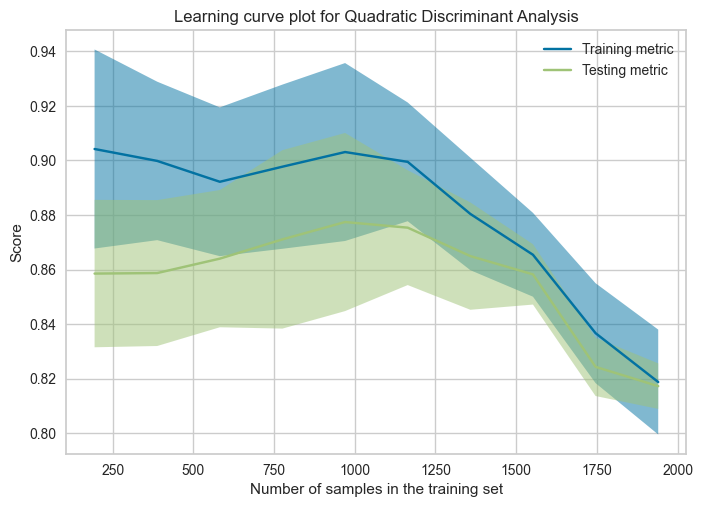

In [57]:
import matplotlib.pyplot as plt
from sklearn.model_selection import LearningCurveDisplay, learning_curve
from sklearn.metrics import fbeta_score, make_scorer

ffour_scorer = make_scorer(fbeta_score, beta=4)
ffour_scorer

X = nearmiss.get_config("X_transformed")
y = nearmiss.get_config("y_transformed")

common_params = {
    "X": X,
    "y": y,
    "train_sizes": np.linspace(0.1, 1.0, 10),
    "score_type": "both",
    "cv": 5,
    "scoring": ffour_scorer,
}

LearningCurveDisplay.from_estimator(best_model, **common_params)
plt.title('Learning curve plot for Quadratic Discriminant Analysis')
plt.show()

The QDA model initially fits the training data very well, but as more data is added, the model’s performance on training data drops and its performance on testing data stabilizes, indicating better generalization with more data. Jarak antara training dan testing score awalnya sangat lebar dan terus berkurang seiring dengan pertambahan data, namun masih sedikit overfitting, gap terkecil terdapat pada train size 0.8

b. Probability Thresholds

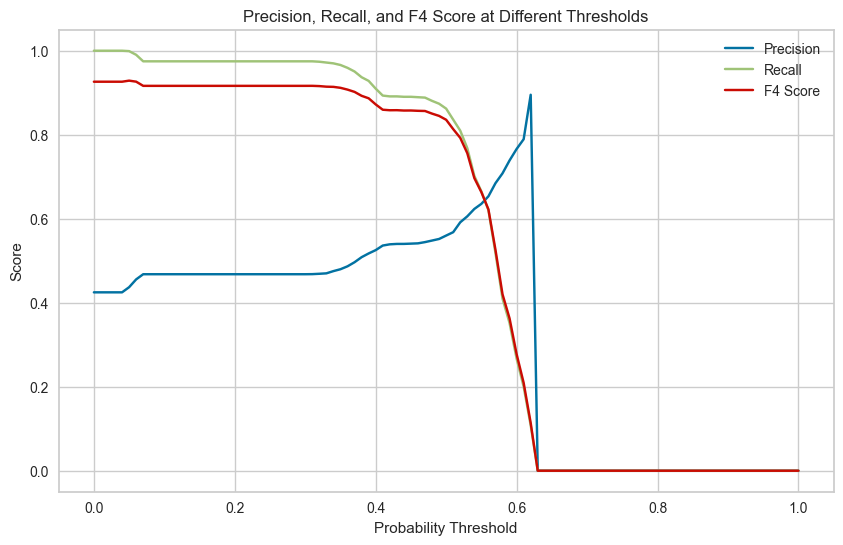

In [58]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import precision_recall_curve, fbeta_score



X_train= nearmiss.get_config('X_transformed')
y_train= nearmiss.get_config('y_transformed')

# Predict probabilities
y_probs = best_model.predict_proba(X_train)[:, 1]

# Function to calculate precision, recall, and F4 score at different thresholds
def calculate_metrics(y_true, y_probs, thresholds):
    precision = []
    recall = []
    f4_scores = []
    
    for t in thresholds:
        y_pred = (y_probs >= t).astype(int)
        precision.append(np.sum((y_pred == 1) & (y_true == 1)) / np.sum(y_pred) if np.sum(y_pred) > 0 else 0)
        recall.append(np.sum((y_pred == 1) & (y_true == 1)) / np.sum(y_true))
        f4_scores.append(fbeta_score(y_true, y_pred, beta=4))
    
    return precision, recall, f4_scores

# Evaluate metrics at different thresholds
thresholds = np.arange(0.0, 1.01, 0.01)
precision, recall, f4_scores = calculate_metrics(y_train, y_probs, thresholds)

# Plot precision, recall, and F4 score for different thresholds
plt.figure(figsize=(10, 6))
plt.plot(thresholds, precision, label='Precision')
plt.plot(thresholds, recall, label='Recall')
plt.plot(thresholds, f4_scores, label='F4 Score')
plt.xlabel('Probability Threshold')
plt.ylabel('Score')
plt.title('Precision, Recall, and F4 Score at Different Thresholds')
plt.legend()
plt.grid(True)
plt.show()


Pada grafik probability treshold untuk F4, recall, dan presisi, memperlihatkan bahwa pada:

- F4 dan Recall: Nilai F4 dan recall pada treshold lebih kecil dari 0.4 stabil dan cenderung bagus, sebelum turun drastis pada probability treshold sekitar 0.5

- Presisi: Nilai presisi awalnya stabil dengan sedikit kenaikan menuju 0.4 kemudian mengalami kenaikan drastis hingga treshold 0.6 namun turun drastis pada treshold 0.6

Pada model kali ini mempertimbangkan nilai F4 dimana nilai ini memberikan bobot yang lebih besar terhadap recall dibandingkan terhadap presisi, sehingga dipilih treshold 0.4 dimana nilai recall masih cukup tinggi dengan nilai presisi tidak terlalu rendah.

e. Calibration Curve

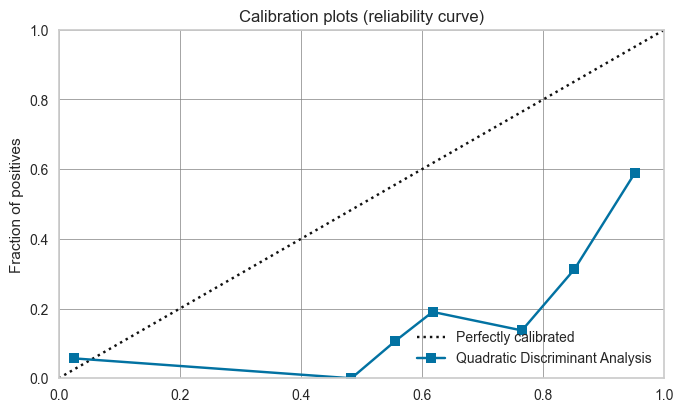

In [59]:
nearmiss.plot_model(best_model,'calibration')


- Underestimation at lower probabilities: The initial flatness of the curve indicates that the model underestimates the probability of positive outcomes at lower predicted probabilities.
- Mixed performance at mid-range probabilities: The curve's fluctuation around mid-range predicted probabilities (0.4 to 0.6) shows that the model's predictions do not consistently match the actual outcomes in this range.
- Better performance at higher probabilities: The steep rise towards the higher end of predicted probabilities suggests that the model's higher probability predictions are closer to the actual fraction of positives, though the steepness indicates overconfidence.

Overall, the calibration curve reveals that while the Quadratic Discriminant Analysis model is somewhat effective in predicting high probabilities for positive outcomes, it struggles with consistency across the full range of predicted probabilities and tends to underpredict at lower probabilities and overpredict at higher probabilities.

#### **6.3 Prediction on Validation Data**

Dari hasil clasification report antara train data dan validasi data, didapatkan nilai-nilai classification report yang tidak terlalu jauh antara 2 nilai tersebut, sehingga dapat disimpulkan bahwa model tidak mengalami underfitting maupun overfitting.

In [60]:
a= nearmiss.tune_model(qda_imb_tuned, optimize='F4', return_train_score=True)

Processing:   0%|          | 0/7 [00:00<?, ?it/s]

Fitting 5 folds for each of 10 candidates, totalling 50 fits


Setelah semua kinerja model dinilai benar, sekarang saatnya untuk fitting dengan data train + validation.

In [61]:
final_model = nearmiss.finalize_model(best_model)

## **7. Model Intrepetation**

#### **7.1 Model Workflow**

Discriminant analysis belongs to the branch of classification methods called generative modeling, where we try to estimate the within-class density of X given the class label. Combined with the `prior probability (unconditioned probability)` of classes, the `posterior probability` of Y can be obtained by the Bayes formula. Quadratic Disctiminant Analysis is one of discriminant analysis methods, Quadratic Discriminant Analysis (QDA) is a classification technique that generalizes Linear Discriminant Analysis (LDA) by allowing each class to have its own `covariance matrix`, it adapts to the unique characteristics and variability within different classes, making it a formidable ally in diverse datasets.

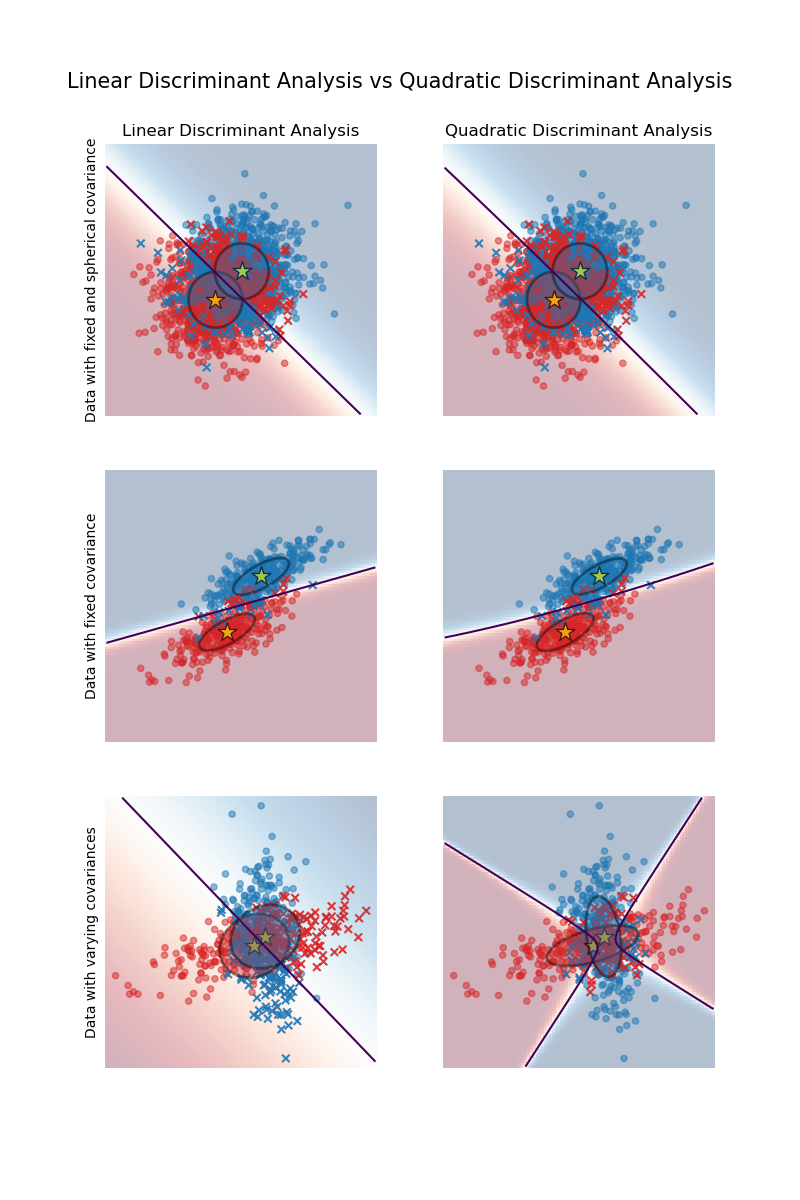



The plot shows decision boundaries for Linear Discriminant Analysis and Quadratic Discriminant Analysis. The bottom row demonstrates that Linear Discriminant Analysis can only learn linear boundaries, while Quadratic Discriminant Analysis can learn quadratic boundaries and is therefore more flexible.

Key Assumptions:
1. `Multivariate Normality`: QDA assumes that the predictor variables within each class follow a multivariate normal distribution. This means that the feature values for each class form a bell-shaped distribution in a higher-dimensional space. While this assumption may appear stringent, it allows QDA to capture the statistical properties of the data in a meaningful way.
2. `Class-Specific Covariance Matrix`: QDA goes a step further by assuming that each class has its own covariance matrix. This implies that the spread and shape of the feature values can vary across different classes. By estimating separate covariance matrix, QDA accommodates the unique characteristics and variability within each class, enabling more flexible modelling.
3. `Independence of Observations`: QDA assumes that the observations within each class are independent of each other. In other words, the feature values for one observation do not depend on or influence the feature values of other observations within the same class. This assumption simplifies the modelling process and ensures that each observation contributes independently to the classification.


Mathematical Formulation:
1. Probability Density Function:
    Each class *k* is assumed to follow a multivariate normal distribution with its own mean vector μk and covariance matrix Σk:
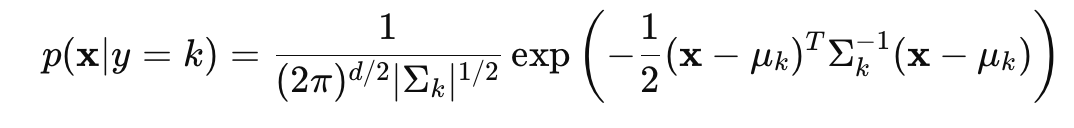

    where x is the feature vector, d is the number of features, and y is the class label.

2. Prior Probabilities:
    The prior probability of each class P(y=k) can be estimated from the training data.

3. Posterior Probabilities:
    Using Bayes’ theorem, the posterior probability for class k given the feature vector x is:
    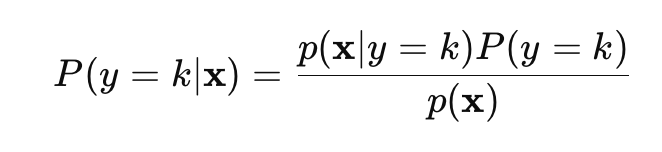

    where p(x) is the marginal probability density of x, calculated by summing over all classes:

    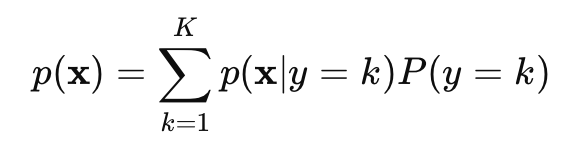
    

4. Discriminant Function:
    For classification, the discriminant function for each class k is derived as:
    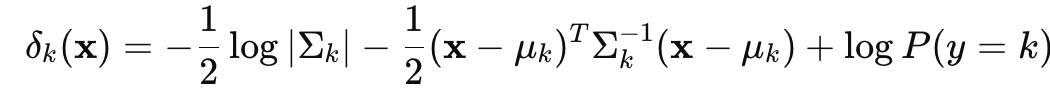

    The class with the highest discriminant function value is chosen as the predicted class:    
    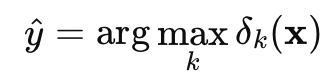

#### **7.2 Model Limitation**

In [62]:
#Dataset Information
print(f'Sum of row and columns: {df_seen.shape}')

pd.DataFrame({
    'Name': df_seen.columns.values,
    'Type': df_seen.dtypes.values,
    'N/A (%)': df_seen.isna().mean().values * 100,
    'Unique': df_seen.nunique().values,
    'Sample': [df_seen[col].unique() for col in df.columns]
})

Sum of row and columns: (3882, 11)


,Name,Type,N/A (%),Unique,Sample
0,Dependents,object,0.0,2,"[No, Yes]"
1,tenure,int64,0.0,73,"[11, 34, 47, 72, 52, 66, 6, 71, 44, 4, 2, 1, 4..."
2,OnlineSecurity,object,0.0,3,"[No, Yes, No internet service]"
3,OnlineBackup,object,0.0,3,"[No, Yes, No internet service]"
4,InternetService,object,0.0,3,"[Fiber optic, No, DSL]"
5,DeviceProtection,object,0.0,3,"[Yes, No internet service, No]"
6,TechSupport,object,0.0,3,"[No, Yes, No internet service]"
7,Contract,object,0.0,3,"[Month-to-month, One year, Two year]"
8,PaperlessBilling,object,0.0,2,"[Yes, No]"
9,MonthlyCharges,float64,0.0,1321,"[99.5, 100.05, 113.45, 25.4, 19.65, 50.55, 23...."


In [63]:
df_seen['MonthlyCharges'].max()

118.6

Model ini bekerja dengan baik dengan beberapa limitasi:
- `Dependents` : Type dependents No/Yes saja
- `Tenure`: Tenure antara 0-72 bulan
- `Internet Service`: Jenis internet servis yang digunakan oleh customer hanya Fiber Optic, DSL, atau tidak ada
- `Contract`: Type kontrak hanya 3 yaitu Month-to-month, ONe Year, dan Two Year
- `Paperless Billing`: Type billing hanya Yes dan No
- `Monthyly Charge`: Monthly charge berkisar antara $18,8-$118,6

#### **7.3 Features Importance**

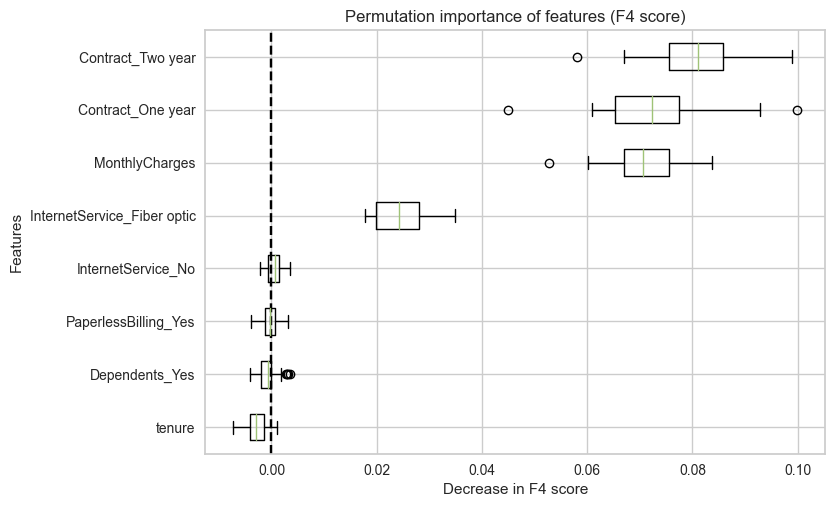

In [64]:
from sklearn.inspection import permutation_importance
from sklearn.metrics import make_scorer, fbeta_score
import matplotlib.pyplot as plt

# specify metric
ffour_scorer = make_scorer(fbeta_score, beta=4)

# define X_test and y_test
X_train = nearmiss.get_config('X_transformed')
y_train = nearmiss.get_config('y_transformed')

# plot permutation importance
result = permutation_importance(best_model, X_train, y_train, n_repeats=30, random_state=15, n_jobs=-1, scoring=ffour_scorer)
perm_sorted_idx = result.importances_mean.argsort()
plt.boxplot(result.importances[perm_sorted_idx].T, vert=False,
        labels=X.columns[perm_sorted_idx])
plt.axvline(x=0, color="black", linestyle="--")
plt.title("Permutation importance of features (F4 score)")
plt.ylabel('Features')
plt.xlabel("Decrease in F4 score")
plt.show()

Dari plot permutasi dapat terlihat bahwa fitur yang memiliki dampak terpesar pada nilai F4 apabila dilakukan pengacakan adalah jenis kontrak yang dipilih oleh customer, kemudian diikuti dengan monthly charges dan jenis internet servisnya. Untuk fitur lainnya tidak terlalu mempengaruhi nilai F4 yang didapatkan oleh model

#### **7.4 When is model works best**

In [65]:
result= nearmiss.predict_model(final_model, data= df_seen, raw_score=True)

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,F4
0,Quadratic Discriminant Analysis,0.6471,0.8292,0.8990,0.4224,0.5748,0.3346,0.4053,0.8431


In [66]:
bin= pd.cut(result['prediction_score_1'], bins= 10, labels=False)
result['group']= bin
bin_counts = result['group'].value_counts().sort_index()

In [67]:
result

,Dependents,tenure,OnlineSecurity,OnlineBackup,InternetService,DeviceProtection,TechSupport,Contract,PaperlessBilling,MonthlyCharges,Churn,prediction_label,prediction_score_0,prediction_score_1,group
2196,No,11,No,No,Fiber optic,Yes,No,Month-to-month,Yes,99.500000,1,1,0.3795,0.6205,9
2284,No,34,No,No,Fiber optic,Yes,No,Month-to-month,Yes,100.050003,1,1,0.4231,0.5769,8
2583,Yes,47,Yes,Yes,Fiber optic,Yes,Yes,One year,Yes,113.449997,0,0,0.6233,0.3767,5
1615,No,72,No internet service,No internet service,No,No internet service,No internet service,Two year,No,25.400000,0,0,0.9247,0.0753,0
4757,Yes,52,No internet service,No internet service,No,No internet service,No internet service,One year,No,19.650000,0,0,0.7024,0.2976,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4638,Yes,51,Yes,Yes,DSL,No,Yes,One year,Yes,69.750000,0,0,0.6432,0.3568,5
4237,No,7,No,No,Fiber optic,No,No,Month-to-month,Yes,79.300003,1,1,0.3663,0.6337,9
1385,Yes,12,No,No,DSL,No,No,Month-to-month,Yes,44.549999,1,1,0.4816,0.5184,7
4586,Yes,3,No,No,DSL,No,Yes,Month-to-month,No,70.699997,0,1,0.5432,0.4568,6


In [68]:
from sklearn.metrics import *
results = []

for i in result.group.unique():
    dt = result[result['group'] == i]
    if i <= 5:
        a = balanced_accuracy_score(dt['Churn'], dt['prediction_label'])
        b = recall_score(dt['Churn'], dt['prediction_label'], pos_label=0)
        c = precision_score (dt['Churn'], dt['prediction_label'], pos_label=0)
        d = fbeta_score(dt['Churn'], dt['prediction_label'], beta=4,pos_label=0)
    else:
        a = balanced_accuracy_score(dt['Churn'], dt['prediction_label'])
        b = recall_score(dt['Churn'], dt['prediction_label'])
        c = precision_score (dt['Churn'], dt['prediction_label'])
        d = fbeta_score(dt['Churn'], dt['prediction_label'], beta=4)

    # Append a dictionary of the results to the list
    results.append({
        'group': i,
        'accuracy': a, 
        'recall': b, 'precision':c,
        'F4':d
    })

results_df = pd.DataFrame(results)

results_df = results_df.sort_values(by='group')
results_df

,group,accuracy,recall,precision,F4
3,0,0.500000,1.000000,0.970885,0.998239
5,3,0.500000,1.000000,0.936170,0.996005
4,4,0.500000,1.000000,0.951311,0.996998
2,5,0.515326,0.970046,0.871636,0.963646
7,6,0.500000,1.000000,0.110092,0.677741
6,7,0.500000,1.000000,0.218468,0.826152
1,8,0.500000,1.000000,0.387473,0.914922
0,9,0.500000,1.000000,0.658824,0.970438


In [69]:
prob_group= result.groupby('group').agg(func={'prediction_score_1':['min','max']})

prob_group

prediction_score_1        
                     min     max
group                           
0                 0.0426  0.0880
3                 0.2545  0.2826
4                 0.2842  0.3440
5                 0.3441  0.4042
6                 0.4046  0.4643
7                 0.4646  0.5248
8                 0.5250  0.5850
9                 0.5852  0.6454

In [ ]:
0.4046-0.4643

Dengan melihat probabilitas tiap grupnya, terlihat bahwa machine learning mengalami penurunan score f4 secara signifikan pada frup 6 atau saat probabilitas dari score prediksinya berkisar 0.4046-0.4643. Pada probabilitas lainnya mesin memiliki performa yang baik.

## **8. Prediction Unseen Data**

In [70]:
predict_unseen = nearmiss.predict_model(final_model, data=df_unseen, raw_score=True)

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,F4
0,Quadratic Discriminant Analysis,0.6756,0.8416,0.9264,0.4467,0.6028,0.3808,0.4540,0.8713


#### **8.1 Impact Data**

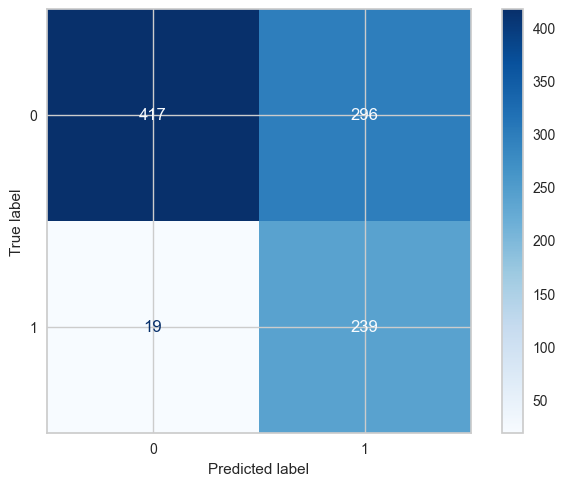

In [71]:
cm = confusion_matrix(predict_unseen['Churn'],predict_unseen['prediction_label'])

# Display confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(cmap=plt.cm.Blues)
plt.show()


Dari business understanding:

**Type 1 Error Simulation**

Retention Cost= (CAC/4)=($694/4)= $173,5 per Customer

**Type 2 Error Simulation**

Losing Customer Lifetime Value = Recurring Revenue x Diff Customer Lifespan = $70,35x(29-9)= $1407

Losing Customer Lifetime Value + Customer Acquisition Cost= $1407 + $694= $2101 per Customer

**1. Menggunakan Machine learning**

   Dari 971 pelanggan, machine learning berhasil memprediksi churn customer dengan benar sebanyak 656 customer, sedangkan 315 sisanya terprediksi salah. Total biaya yang perusahaan keluarkan saat menggunakan model machine learning adalah sebesar:
   
   - Mengeluarkan biaya retensi pada orang-orang yang diprediksi churn (TP dan FP):
      Retention Cost x (TP+FP)= $173,5 x (296+239)= $92822.5

   - Kerugian akibat false negative (FN), mesin gagal meprediksi customer yang akan churn:
      (Losing Customer Lifetime Value + Customer Acquisition Cost)x FN= $2101 x 19 = $39919

    Total biaya yang saat menggunakan machine learning adalah sebesar $132.741,5

**2. Tanpa Menggunakan Machine Learning**

Tanpa menggunkan machine learning, maka perusahaan akan memberikan retention treatment kepada seluruh pelanggan

- Retention cost x total pelanggan = $173,5 x 971= $168.468

`Total biaya yang akan dikeluarkan oleh perusahaan untuk melakukan retensi pada semua pelanggan adalah sebesar $168.468`


Dengan menggunakan `machine learning`, perusahaan mampu menghemat biaya sekitar `$35.727` atau sekitar `20%`, selain dengan menggunakan machine learning sudah berhasil memprediksi dengan benar `93%` customer yang berpeluang melakukan churn dari yang aktualnya akan churn.

**Note: Seluruh perhitungan ini adalah hasil pendekatan menggunakan median dari data yang ada, serta pendekatan bersasarkan industri yang sama**

#### **8.2 Counterfactuals Explanation**

In [72]:
import dice_ml

continuous_features = ['tenure','MonthlyCharges']
# prepare the data
df_train = nearmiss.get_config('X_train')
df_train['Churn'] = nearmiss.get_config('y_train')
data_dice = dice_ml.Data(dataframe=df_train, continuous_features=continuous_features, outcome_name='Churn')
data_dice

# model
rf_dice = dice_ml.Model(model=final_model, backend="sklearn")

# explainer
explainer = dice_ml.Dice(data_dice, rf_dice, method="kdtree")

In [73]:
X_test_0= predict_unseen[(predict_unseen['prediction_score_1']>=0.0426)&(predict_unseen['prediction_score_1']<=0.088)].head(2)
X_test_0= X_test_0[['Dependents','tenure','InternetService','Contract','PaperlessBilling','MonthlyCharges']]
X_test_0

,Dependents,tenure,InternetService,Contract,PaperlessBilling,MonthlyCharges
3433,No,69,DSL,Two year,Yes,66.900002
4035,Yes,18,No,Two year,Yes,24.650000


In [74]:
X_test_6= predict_unseen[(predict_unseen['prediction_score_1']>=0.4046)&(predict_unseen['prediction_score_1']<=0.4643)].head(2)
X_test_6= X_test_6[['Dependents','tenure','InternetService','Contract','PaperlessBilling','MonthlyCharges']]
X_test_6

,Dependents,tenure,InternetService,Contract,PaperlessBilling,MonthlyCharges
22,Yes,34,No,Month-to-month,No,20.650000
4546,Yes,64,Fiber optic,Month-to-month,No,81.050003


In [75]:
X_test_9= predict_unseen[(predict_unseen['prediction_score_1']>=0.5852)&(predict_unseen['prediction_score_1']<=0.6454)].head(4)
X_test_9= X_test_9[['Dependents','tenure','InternetService','Contract','PaperlessBilling','MonthlyCharges']]
X_test_9

,Dependents,tenure,InternetService,Contract,PaperlessBilling,MonthlyCharges
852,No,9,Fiber optic,Month-to-month,Yes,76.849998
1215,No,11,Fiber optic,Month-to-month,Yes,84.800003
4689,No,3,Fiber optic,Month-to-month,No,76.099998
377,No,4,Fiber optic,Month-to-month,No,77.949997


In [76]:
# Generate CF based on the blackbox model
cf = explainer.generate_counterfactuals(X_test_0, total_CFs=5, desired_class="opposite")

# Visualize it
cf.visualize_as_dataframe(show_only_changes=True)

100%|██████████| 2/2 [00:10<00:00,  5.43s/it]

Query instance (original outcome : 0)


,Dependents,tenure,InternetService,Contract,PaperlessBilling,MonthlyCharges,Churn
0,No,69,DSL,Two year,Yes,66.900002,0



Diverse Counterfactual set (new outcome: 1)


,Dependents,tenure,InternetService,Contract,PaperlessBilling,MonthlyCharges,Churn
4338,-,59,-,Month-to-month,-,-,1
610,-,-,-,Month-to-month,-,55.150001525878906,1
3226,-,54,-,Month-to-month,-,-,1
1572,-,57,-,Month-to-month,-,53.75,1
2899,-,59,-,Month-to-month,-,51.70000076293945,1


Query instance (original outcome : 0)


,Dependents,tenure,InternetService,Contract,PaperlessBilling,MonthlyCharges,Churn
0,Yes,18,No,Two year,Yes,24.65,0



Diverse Counterfactual set (new outcome: 1)


,Dependents,tenure,InternetService,Contract,PaperlessBilling,MonthlyCharges,Churn
1054,-,-,DSL,Month-to-month,-,-,1
3456,No,-,-,Month-to-month,-,19.549999237060547,1
3044,No,-,-,Month-to-month,-,-,1
2399,No,-,-,Month-to-month,-,-,1
4195,No,-,-,Month-to-month,-,-,1


In [77]:
# Generate CF based on the blackbox model
cf = explainer.generate_counterfactuals(X_test_6, total_CFs=5, desired_class="opposite")

# Visualize it
cf.visualize_as_dataframe(show_only_changes=True)

100%|██████████| 2/2 [00:05<00:00,  2.69s/it]

Query instance (original outcome : 0)


,Dependents,tenure,InternetService,Contract,PaperlessBilling,MonthlyCharges,Churn
0,Yes,34,No,Month-to-month,No,20.65,0



Diverse Counterfactual set (new outcome: 1)


,Dependents,tenure,InternetService,Contract,PaperlessBilling,MonthlyCharges,Churn
1105,No,-,-,-,-,-,1
3723,No,-,-,-,-,-,1
884,No,-,-,-,-,-,1
2757,No,-,-,-,-,-,1
1317,No,-,-,-,-,-,1


Query instance (original outcome : 0)


,Dependents,tenure,InternetService,Contract,PaperlessBilling,MonthlyCharges,Churn
0,Yes,64,Fiber optic,Month-to-month,No,81.050003,0



Diverse Counterfactual set (new outcome: 1)


,Dependents,tenure,InternetService,Contract,PaperlessBilling,MonthlyCharges,Churn
1129,No,-,-,-,Yes,89.0999984741211,1
3163,No,55,-,-,Yes,-,1
4862,No,56,-,-,Yes,76.8499984741211,1
2963,No,56,-,-,Yes,85.5999984741211,1
1345,No,57,-,-,Yes,87.55000305175781,1


In [78]:
# Generate CF based on the blackbox model
cf = explainer.generate_counterfactuals(X_test_9, total_CFs=5, desired_class="opposite")

# Visualize it
cf.visualize_as_dataframe(show_only_changes=True)

  0%|          | 0/4 [00:00<?, ?it/s]

100%|██████████| 4/4 [00:30<00:00,  7.68s/it]

Query instance (original outcome : 1)


,Dependents,tenure,InternetService,Contract,PaperlessBilling,MonthlyCharges,Churn
0,No,9,Fiber optic,Month-to-month,Yes,76.849998,1



Diverse Counterfactual set (new outcome: 0)


,Dependents,tenure,InternetService,Contract,PaperlessBilling,MonthlyCharges,Churn
0,Yes,-,DSL,-,-,-,0
2186,-,-,-,One year,-,-,0
1556,Yes,-,DSL,-,-,-,0
831,-,-,DSL,-,No,-,0
4863,-,-,DSL,-,No,-,0


Query instance (original outcome : 1)


,Dependents,tenure,InternetService,Contract,PaperlessBilling,MonthlyCharges,Churn
0,No,11,Fiber optic,Month-to-month,Yes,84.800003,1



Diverse Counterfactual set (new outcome: 0)


,Dependents,tenure,InternetService,Contract,PaperlessBilling,MonthlyCharges,Churn
2114,-,18,-,One year,-,89.5999984741211,0
2570,-,-,DSL,-,No,-,0
3361,-,-,-,One year,-,94.05000305175781,0
2186,-,-,-,One year,-,74.6500015258789,0
3670,Yes,-,-,One year,-,90.3499984741211,0


Query instance (original outcome : 1)


,Dependents,tenure,InternetService,Contract,PaperlessBilling,MonthlyCharges,Churn
0,No,3,Fiber optic,Month-to-month,No,76.099998,1



Diverse Counterfactual set (new outcome: 0)


,Dependents,tenure,InternetService,Contract,PaperlessBilling,MonthlyCharges,Churn
316,-,-,DSL,-,-,-,0
4863,-,-,DSL,-,-,-,0
831,-,-,DSL,-,-,-,0
2995,-,-,DSL,Two year,-,71.0999984741211,0
4586,Yes,-,DSL,-,-,70.69999694824219,0


Query instance (original outcome : 1)


,Dependents,tenure,InternetService,Contract,PaperlessBilling,MonthlyCharges,Churn
0,No,4,Fiber optic,Month-to-month,No,77.949997,1



Diverse Counterfactual set (new outcome: 0)


,Dependents,tenure,InternetService,Contract,PaperlessBilling,MonthlyCharges,Churn
831,-,-,DSL,-,-,-,0
316,-,-,DSL,-,-,-,0
4863,-,-,DSL,-,-,-,0
762,-,13,DSL,-,-,73.3499984741211,0
2966,-,-,DSL,One year,-,-,0


In [85]:
df_seen.groupby('InternetService').agg(func={'MonthlyCharges':'median'})

,MonthlyCharges
InternetService,
DSL,56.050
Fiber optic,91.325
No,20.150


In [ ]:
df_seen.groupby('InternetService').agg(func={'MonthlyCharges':'median'})

Dari analysis counterfactual didapatkan bahwa untuk mengubah pelanggan yang awalnya churn menjadi tidak churn fitur utama yang harus dipertimbangkan adalah jenis kontraknya, jenis kontrak month-to-month memiliki potensi churn yang lebih besar dari dua jenis kontrak lainnya yaitu One Year dan Two Year. Dari jenis internet servis yang dipilih, customer yang menggunakan fiber optic juga berpotensi lebih besar untuk melakukan churn, dan jika dihubungkan dengan monthly chargenya customer dengan internet servis fiber optic memiliki monthly charge 60% lebih tinggi dari DSL dan 350% dari pelanggan yang tidak memiliki internet servis. Hal lain yang juga perlu diperhatikan adalah pelanggan yang tidak memiliki dependents cenderung melakukan churn jika dibantingkan dengan yang memiliki tanggungan.

## **9. Conclusion and Recomendation**

#### **9.1 Conclusion**

1. Main metric, metrik utama yang digunakan dalam membangun model machine learning kali ini adalah F4 score, karena dampak false negative jauh lebih besar dari false positive.

2. Model terbaik yang digunakan adalah menggunakan Quadratic Discriminant Analysis (QDA) dengan hyperparameter tuning pada priors (0.3,0.7) dan menggunakan probability threshold sebesar 0.4.

3. Model Evaluation, berdasarkan hasil evaluasi model pada data train dan validasi, model sudah bekerja dengan cukup baik terlihat dari tidak ada kecenderungan overfitting maupun underfitting secara signifikan. Hasil kalibrasi memperlihatkan bahwa model effective in predicting high probabilities for positive outcomes but struggles with consistency across the full range.

4. Model Intrepetation

    a. Model Limitation

     - `Dependents` : Type dependents No/Yes saja
     - `Tenure`: Tenure antara 0-72 bulan
     - `Internet Service`: Jenis internet servis yang digunakan oleh customer hanya Fiber Optic, DSL, atau tidak ada
     - `Contract`: Type kontrak hanya 3 yaitu Month-to-month, ONe Year, dan Two Year
     - `Paperless Billing`: Type billing hanya Yes dan No
     - `Monthyly Charge`: Monthly charge berkisar antara $18,8-$118,6

    b. Feature Importance

     Feature yang paling mempengruhi kinerja model (dilihat dari penurunan F4) adalah `Contract` yang dipilih oleh customer, kemudian diikuti dengan `Monthly Charges` dan jenis `Internet Service`.

    c. Model Works Best
        - Model bekerja dengan baik ketika prediksi probabilitas berkisar antara x-x1 dan y-y1.

5.Impact Model

 - Dengan menggunakan machine learning, total biaya yang dikeluarkan oleh perusahaan adalah sebesar $132.741,5
 - Tanpa menggunakan machine learning, total biaya yang akan dikeluarkan oleh perusahaan untuk melakukan retensi pada semua pelanggan adalah sebesar $168.468
 - Perusahaan mampu menghemat biaya sekitar `$35.727` atau sekitar `20%` dengan menggunakan machine learning, selain dengan menggunakan machine learning sudah berhasil memprediksi dengan benar `93%` customer yang pada aktualnya melakukan churn.


#### **9.2 Recomendation**

- Some reccomendation retention stretegies to minimize customer churn:
1. Loyalty Programs
    Offering rewards and incentives for customer who choose One Year or Two Year Contract, sehingga dapat menarik perhatian customer-customer untuk memilih jenis kontrak yang lebih panjang dan meminimalisir kemungkinan churn
2. Cost Evaluation to Fiber Optic Internet service
    Tingginya monthly charge pada konsumen-konsumen yang menggunakan fiber optik sebagai layanan internet menjadi salah satu faktor yang membuat customer churn, oleh karena itu diperlukan lagi evaluasi terhadap harga untuk layanan ini.
3. Secara umum meningkatkan kualitas pelayanan, customer servis, dan berkala mereachout customer agar dapat mengukur kepuasan pelanggan dalam menggunakan servis dari perusahaan.
